In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns

import locale; locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8'); format = lambda num: locale.format_string("%d", num, grouping=True)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi

In [2]:
df = pd.read_csv('../data/ClusteredData.csv')
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Year  Month  ...  AcceptedAnyCampaign  Response  \
0  2012-09-04  2012      9  ...                    0         1   
1  2014-03-08  2014      3  ...                    0         0   
2  2013-08-21  2013      8  ...                    0         0   
3  2014-02-10  2014      2  ...                    0         0   
4  2014-01-19  2014      1  ...                    0         0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   WebVsStorePurchases        Date    IncomeRange  Clusters  
0                    2  2012-09-04  41 Mil-61 Mil         1  
1                    0  2014-03-08  41 Mil-61 Mil         3  
2                    0  2013-08-21  61 Mil-82 Mil         3  
3                    0  2014-02-10  21 Mil-41 Mil         2  
4                    0  2014-01-19  41 Mil-61 Mil         2  

[5 rows x 43 columns]

In [3]:
# Vou te mandar um dataset e depois o que fazer com ele
# df.head().to_clipboard()

In [4]:
analitics_cols = [
    # Demographic and household information
    'Income', 'Kidhome', 'Teenhome', 'Age', 'Recency', 'Complain', 
    'Children', 'FamilySize',
    
    # Monetary and spending data
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'TotalMntSpent', 
    'TotalPurchases', 'AvgPurchaseValue', 
    
    # Purchase behavior and campaign responses
    'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedAnyCampaign', 'Response', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
    'NumWebVisitsMonth', 'WebVsStorePurchases'
]

In [5]:
def plot_trend_by_cluster(df, column):
    # Converter a coluna 'Date' para o formato datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Criar uma nova coluna 'YearMonth' para agrupar por mês
    df['YearMonth'] = df['Date'].dt.to_period('M')
    
    # Agrupar por 'YearMonth' e 'Clusters' e calcular a média da coluna desejada
    trend = df.groupby(['YearMonth', 'Clusters'])[column].mean().reset_index()
    
    # Pivotar o dataframe para ter uma coluna para cada cluster
    trend_pivot = trend.pivot(index='YearMonth', columns='Clusters', values=column)
    
    # Preencher os valores ausentes com 0
    trend_pivot = trend_pivot.fillna(0)
    
    # Definir o estilo do Seaborn
    sns.set(style='whitegrid')
    plt.figure(figsize=(14, 7))
    
    # Criar o gráfico de linha
    for cluster in trend_pivot.columns:
        sns.lineplot(data=trend_pivot, x=trend_pivot.index.astype(str), y=trend_pivot[cluster], label=f'Cluster {cluster}', marker='o', linewidth=2.5)
    
    # Adicionar título e rótulos
    plt.title(f'Média de {column} por Cluster ao Longo do Tempo', fontsize=18, fontweight='bold')
    plt.xlabel('Mês', fontsize=14)
    plt.ylabel(f'Média de {column}', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Cluster', title_fontsize='13', fontsize='12')
    
    # Adicionar uma grade de fundo
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # Remover a coluna 'YearMonth'
    df.drop(columns='YearMonth', inplace=True)

#for col in analitics_cols:
 #   plot_trend_by_cluster(df, col)

In [6]:
def plot_education_trend(df):
    # Converter a coluna 'Date' para o formato datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Criar uma nova coluna 'YearMonth' para agrupar por mês
    df['YearMonth'] = df['Date'].dt.to_period('M')
    
    # Calcular o número total de clientes por mês
    total_customers_per_month = df.groupby('YearMonth').size()
    
    # Agrupar por 'YearMonth' e 'Education' e contar o número de ocorrências
    education_trend = df.groupby(['YearMonth', 'Education']).size().reset_index(name='Count')
    
    # Calcular a porcentagem de cada nível de educação por mês
    education_trend['Percentage'] = education_trend.apply(
        lambda row: (row['Count'] / total_customers_per_month[row['YearMonth']]) * 100, axis=1
    )
    
    # Pivotar o dataframe para ter uma coluna para cada nível de educação
    education_trend_pivot = education_trend.pivot(index='YearMonth', columns='Education', values='Percentage')
    
    # Preencher os valores ausentes com 0
    education_trend_pivot = education_trend_pivot.fillna(0)
    
    # Definir o estilo do Seaborn
    sns.set(style='whitegrid')
    plt.figure(figsize=(14, 7))
    
    # Criar o gráfico de linha
    for education in education_trend_pivot.columns:
        sns.lineplot(data=education_trend_pivot, x=education_trend_pivot.index.astype(str), y=education_trend_pivot[education], label=education, marker='o', linewidth=2.5)
    
    # Adicionar título e rótulos
    plt.title('Percentual de Níveis de Educação ao Longo do Tempo', fontsize=18, fontweight='bold')
    plt.xlabel('Mês', fontsize=14)
    plt.ylabel('Percentual (%)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Nível de Educação', title_fontsize='13', fontsize='12')
    
    # Adicionar uma grade de fundo
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # Remover a coluna 'YearMonth'
    df.drop(columns='YearMonth', inplace=True)

#plot_education_trend(df[df['Clusters'] == 0])
#plot_education_trend(df[df['Clusters'] == 1])
#plot_education_trend(df[df['Clusters'] == 2])
#plot_education_trend(df[df['Clusters'] == 3])

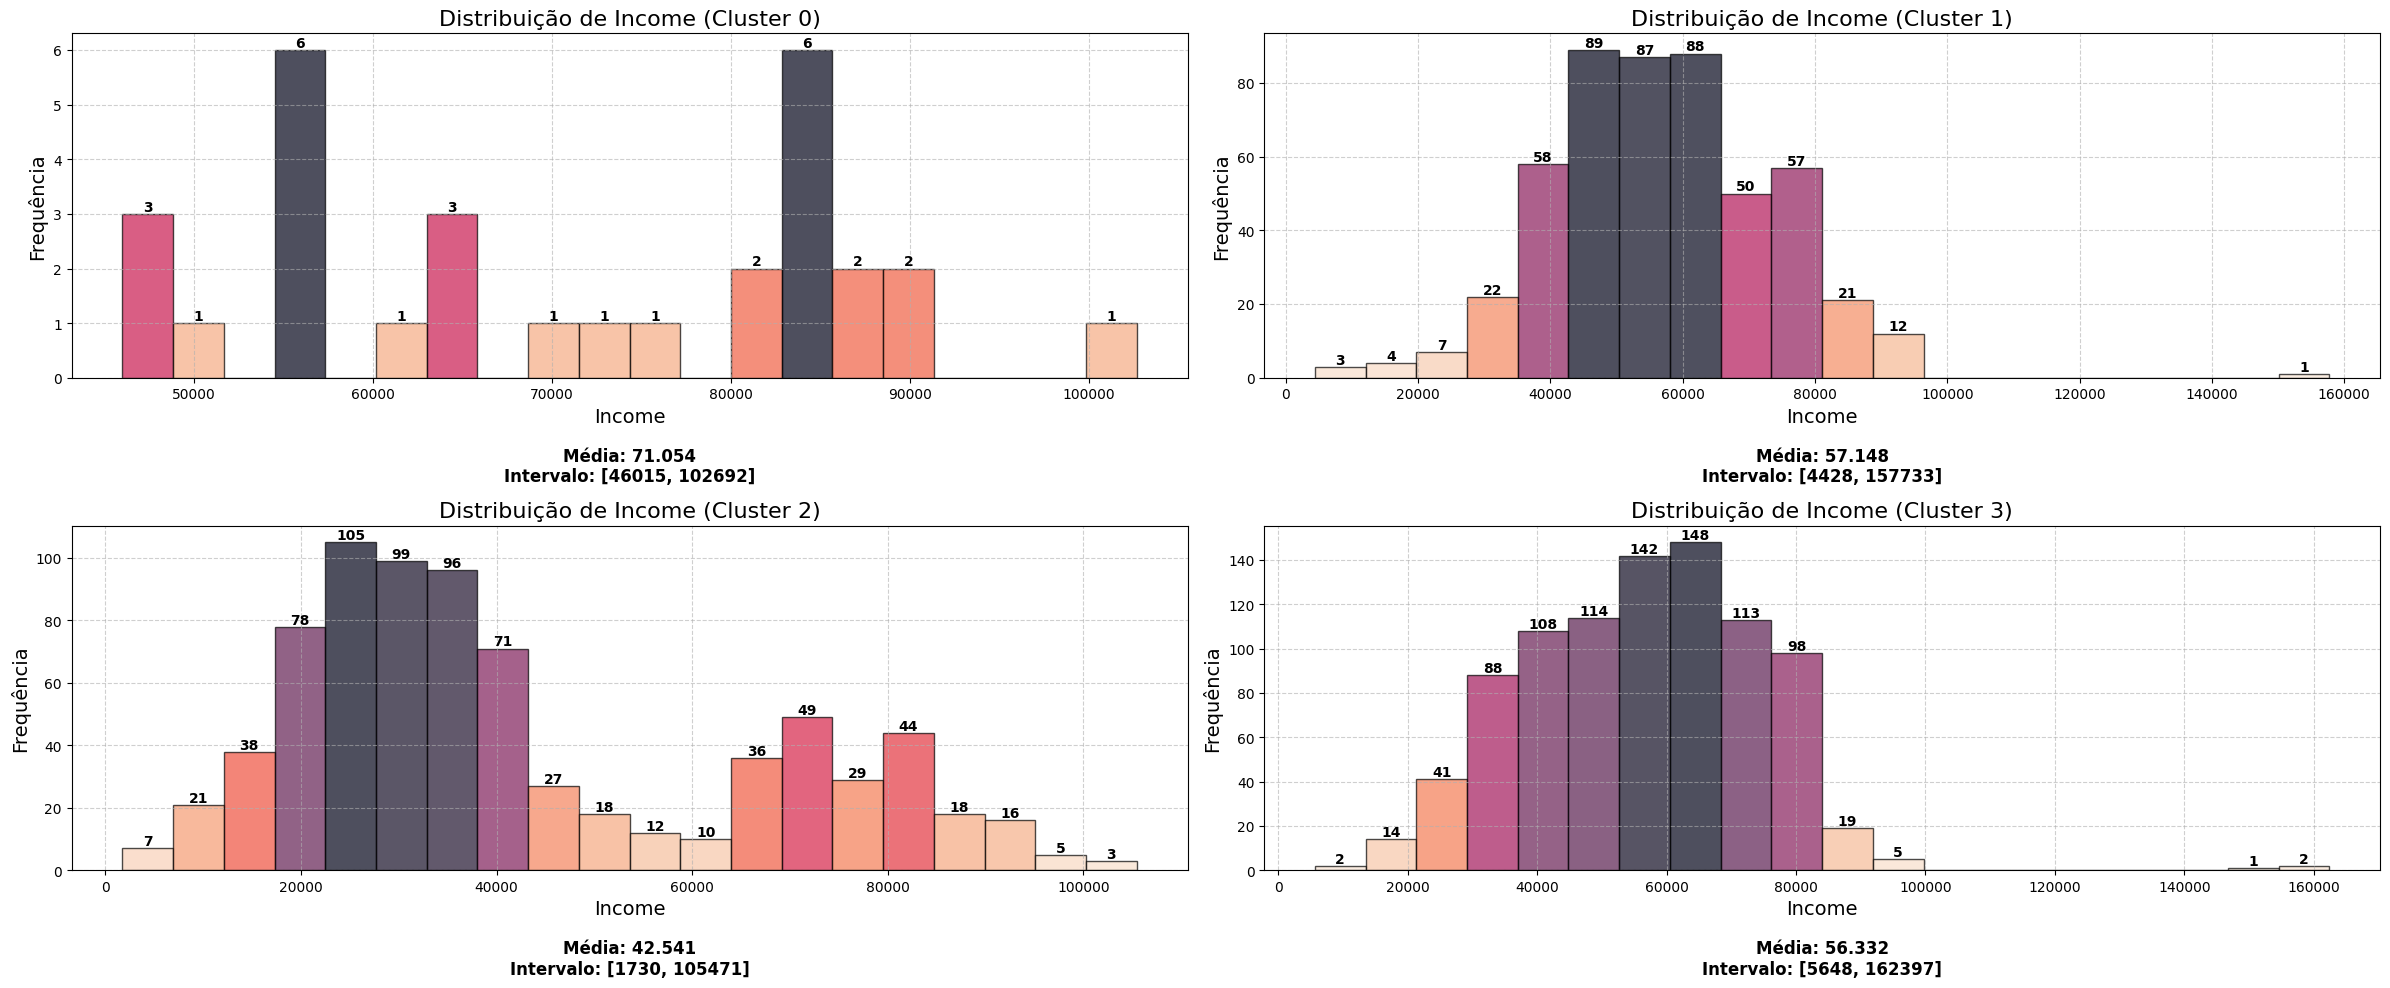

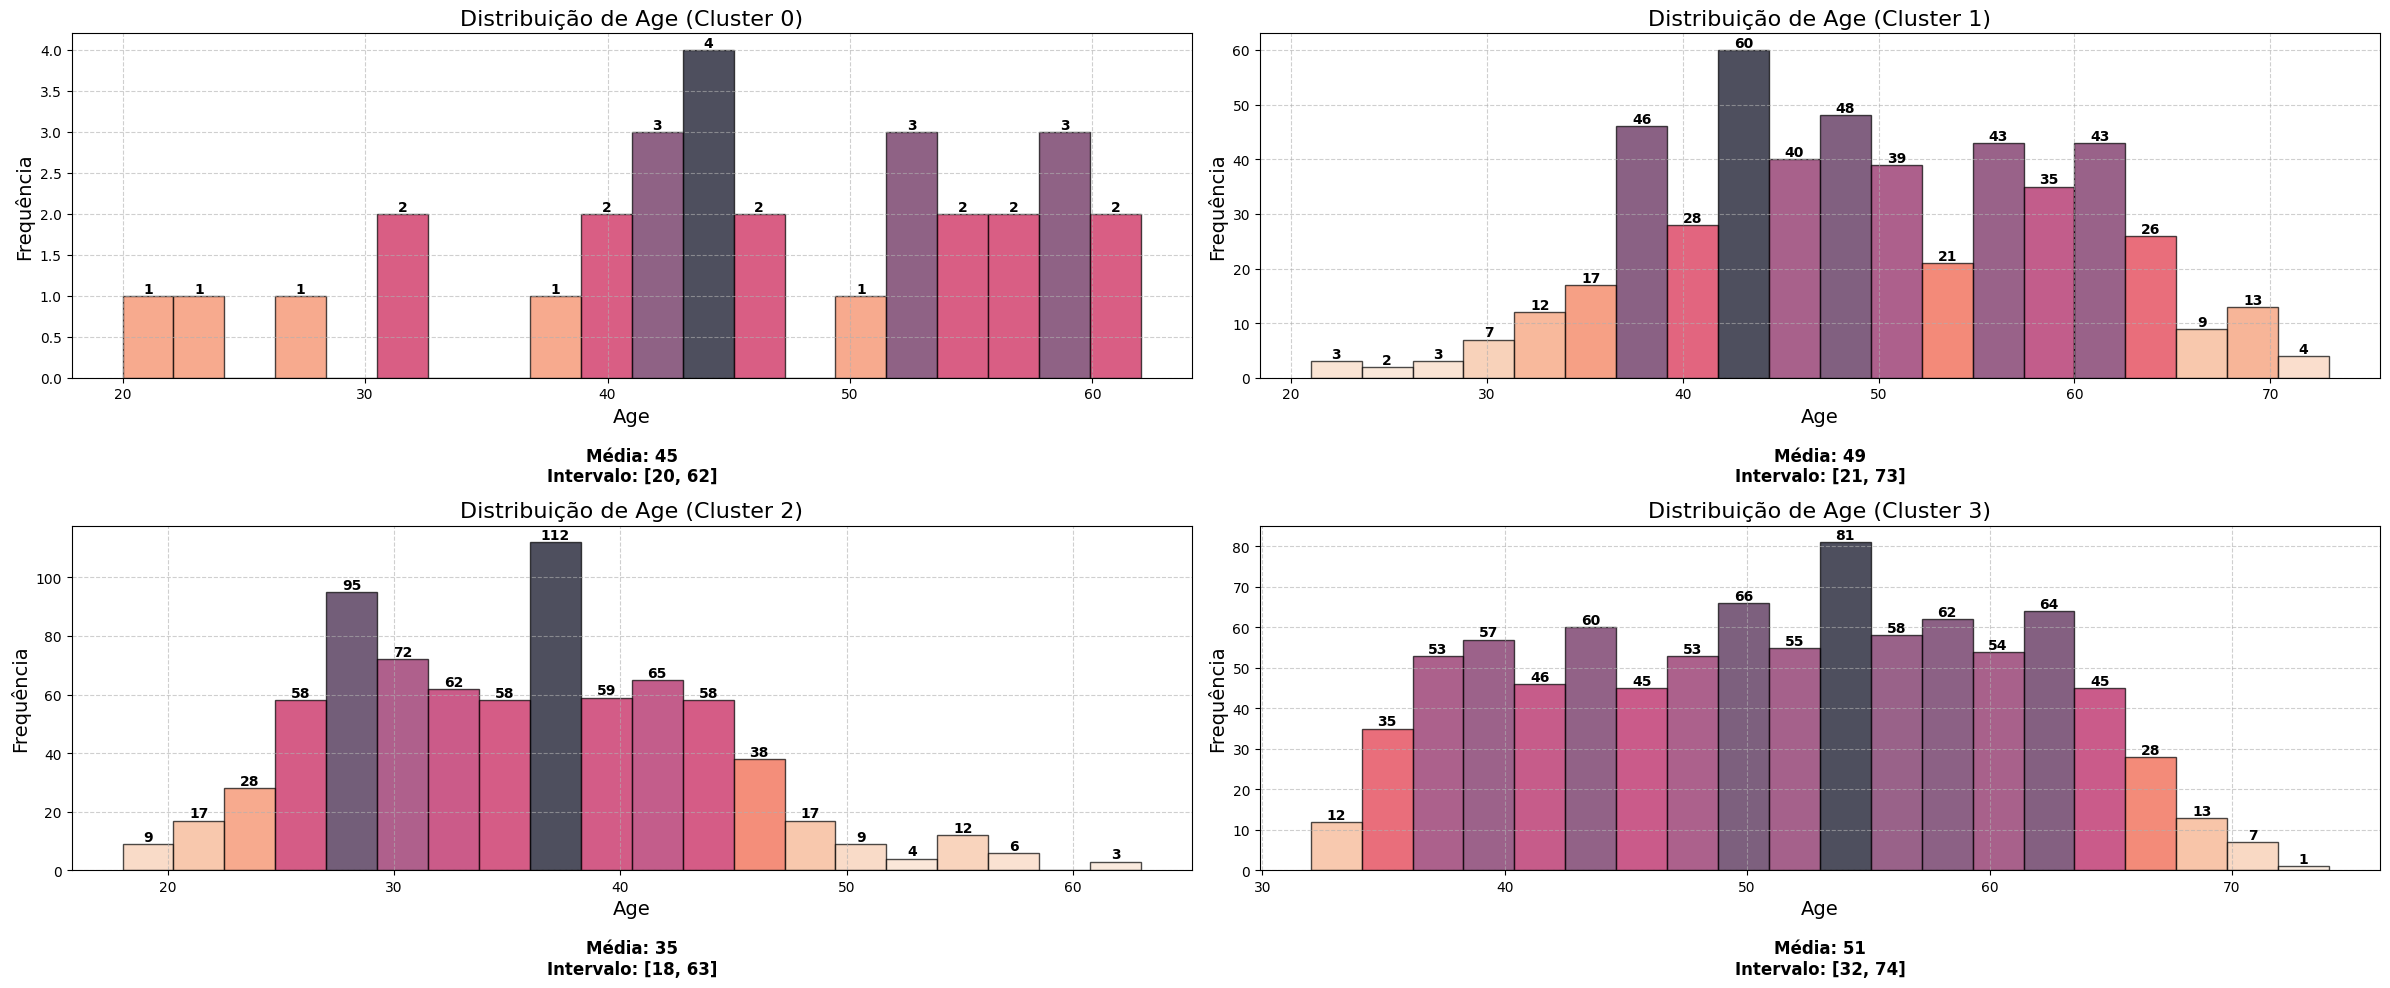

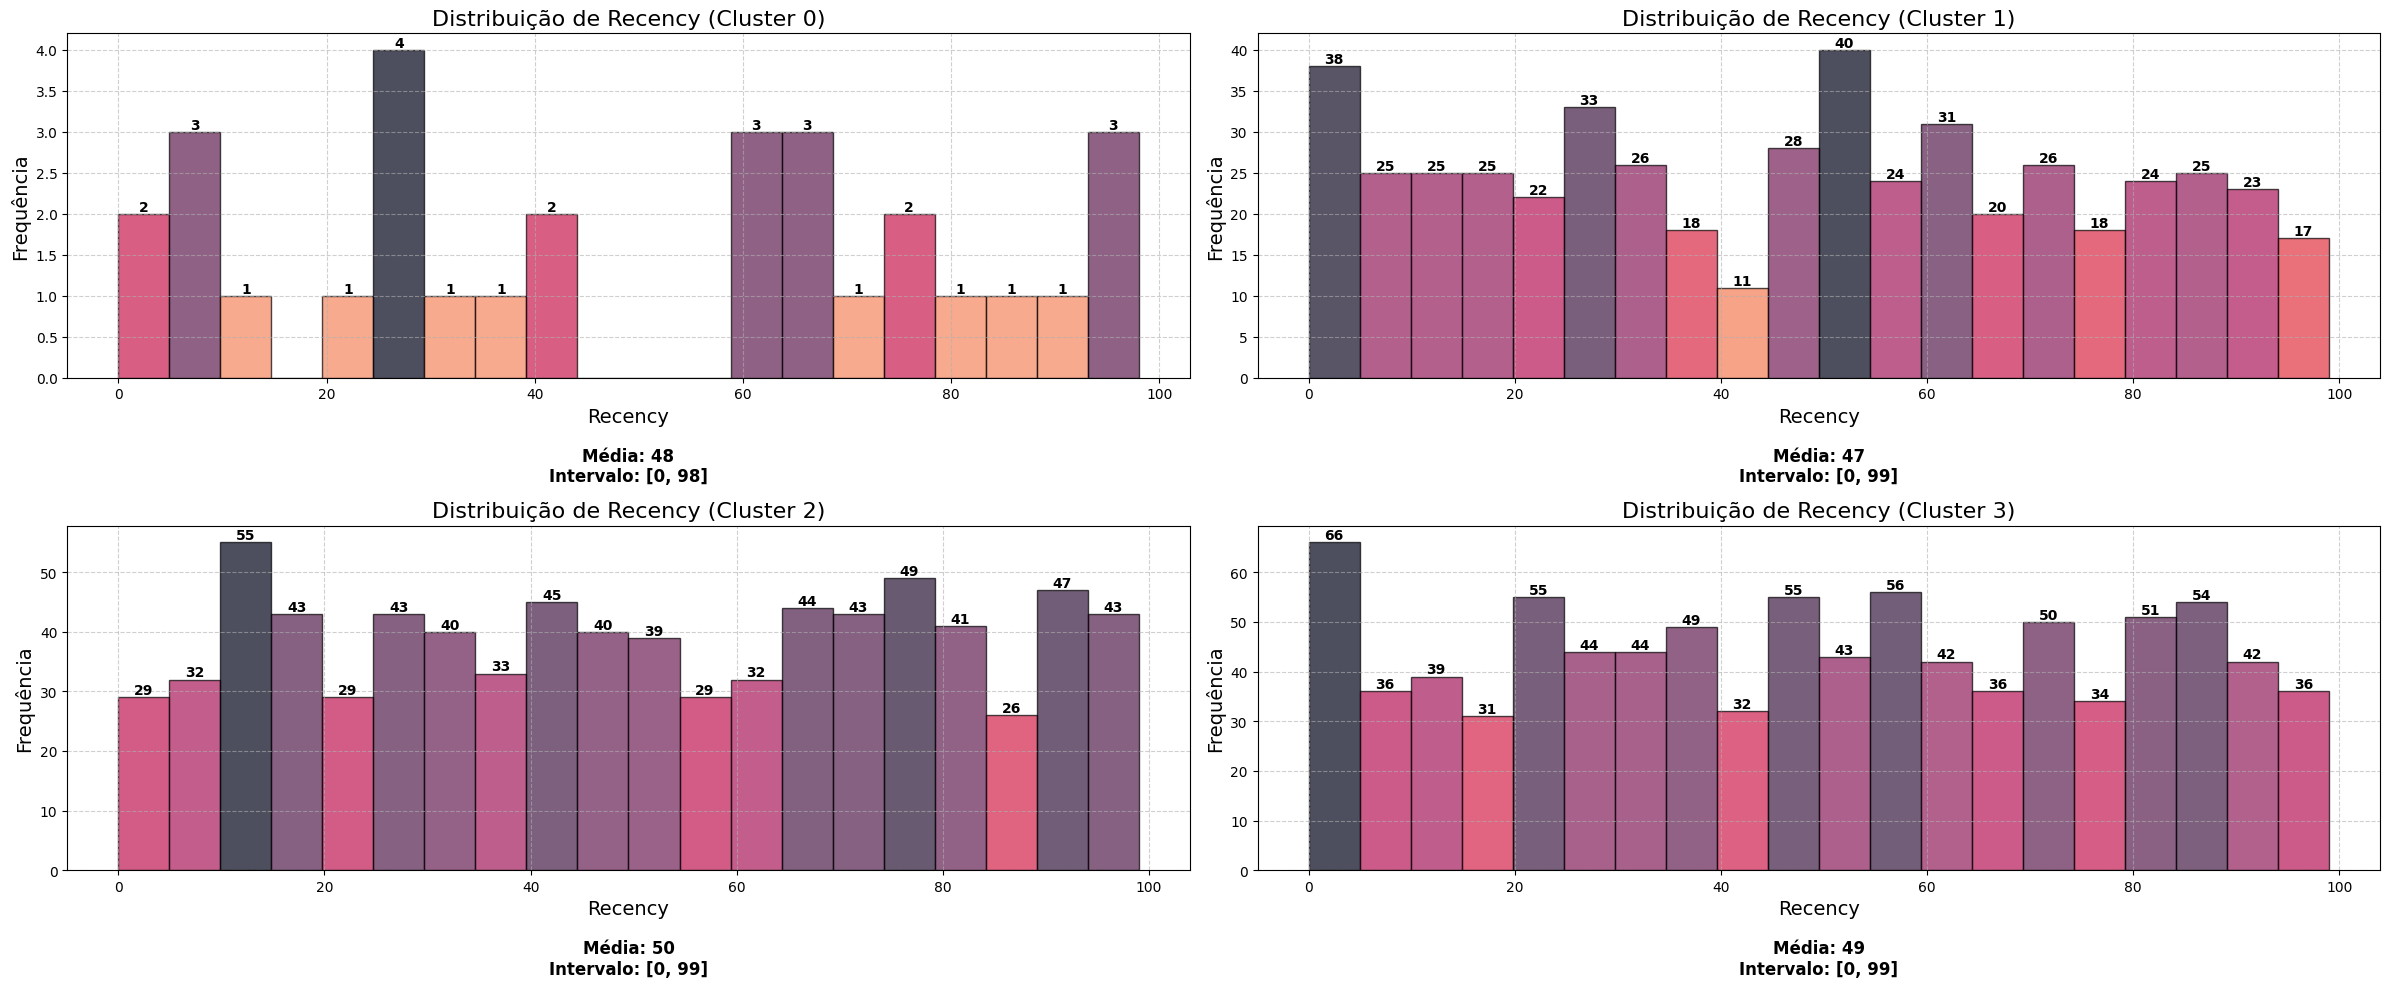

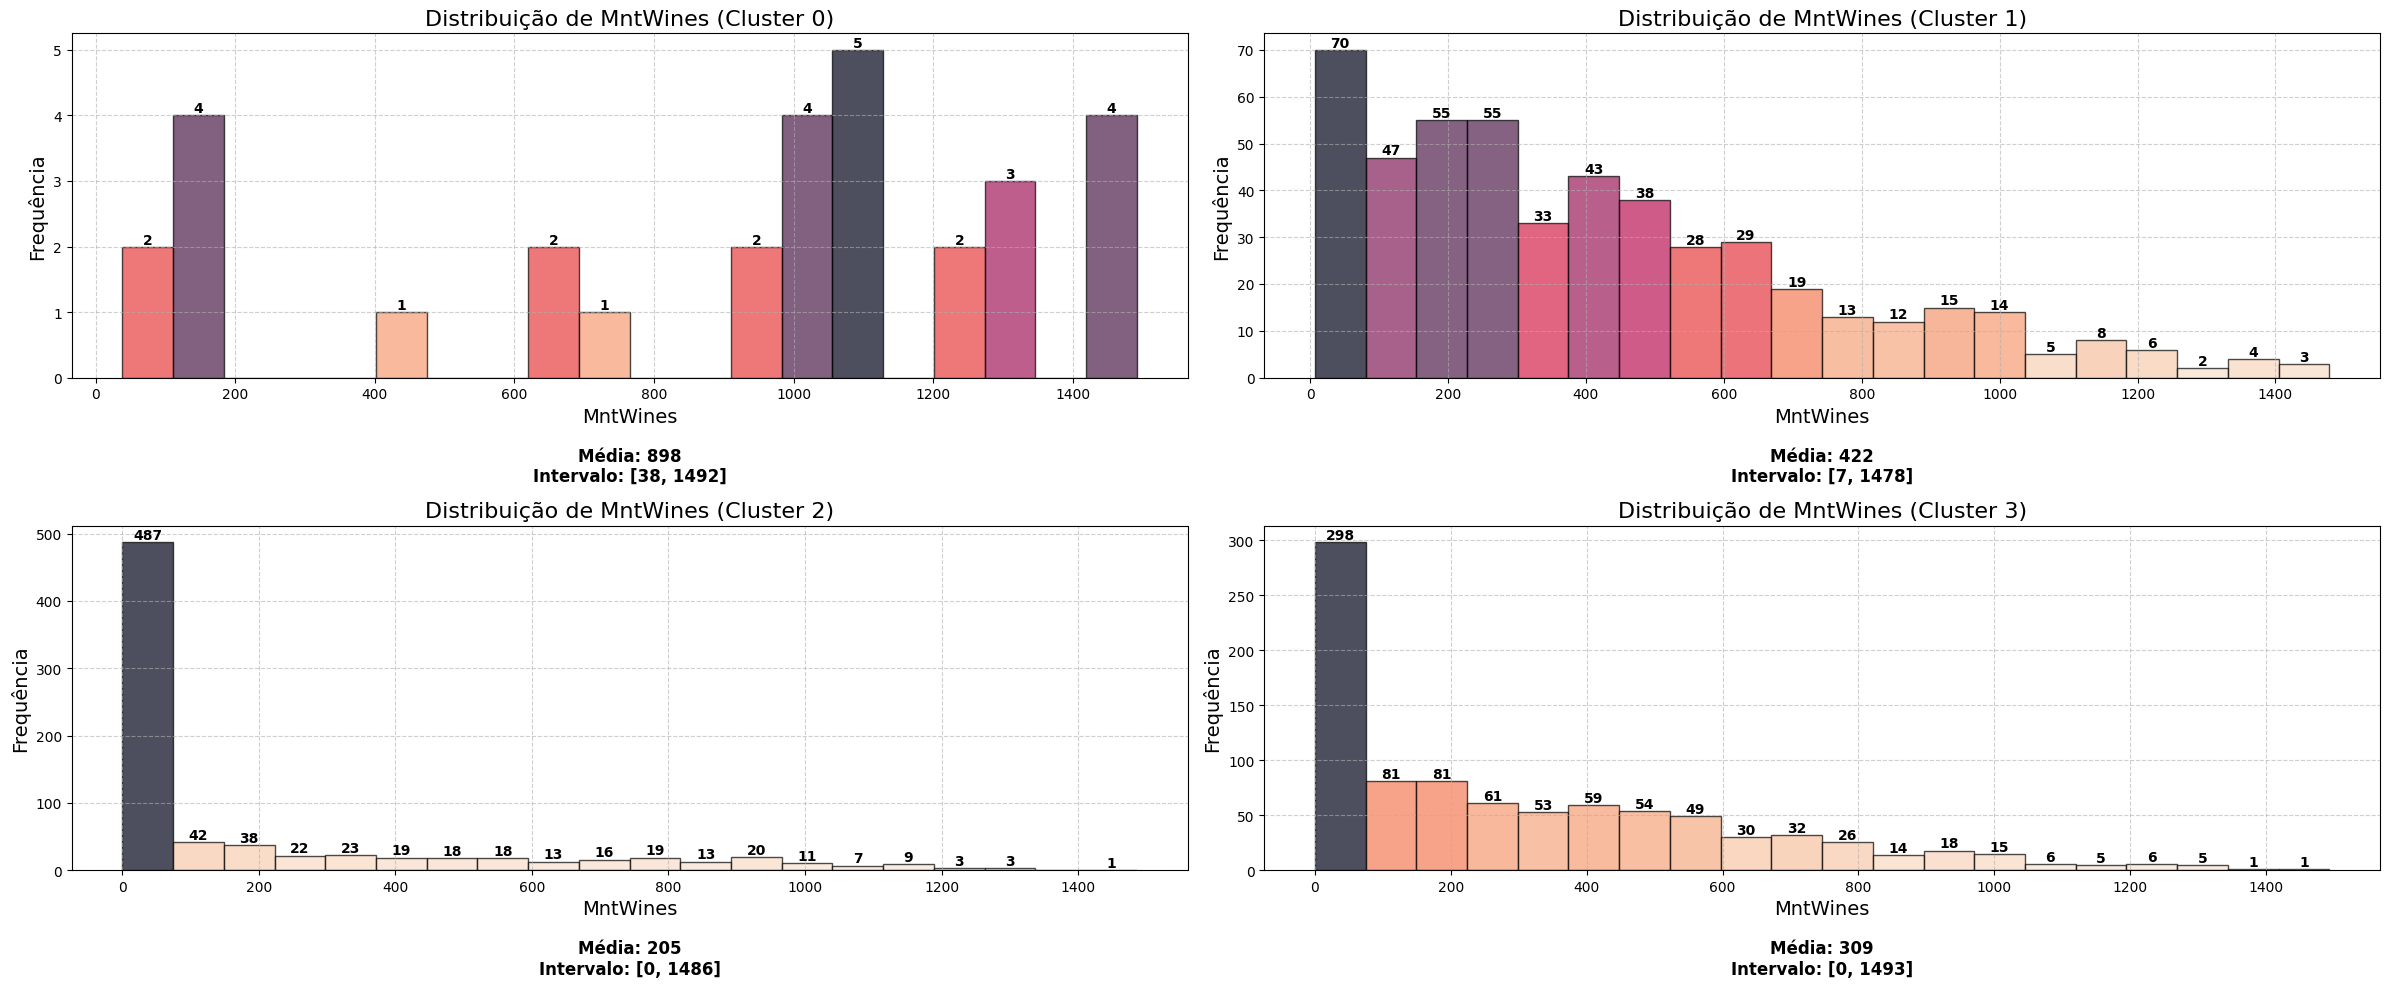

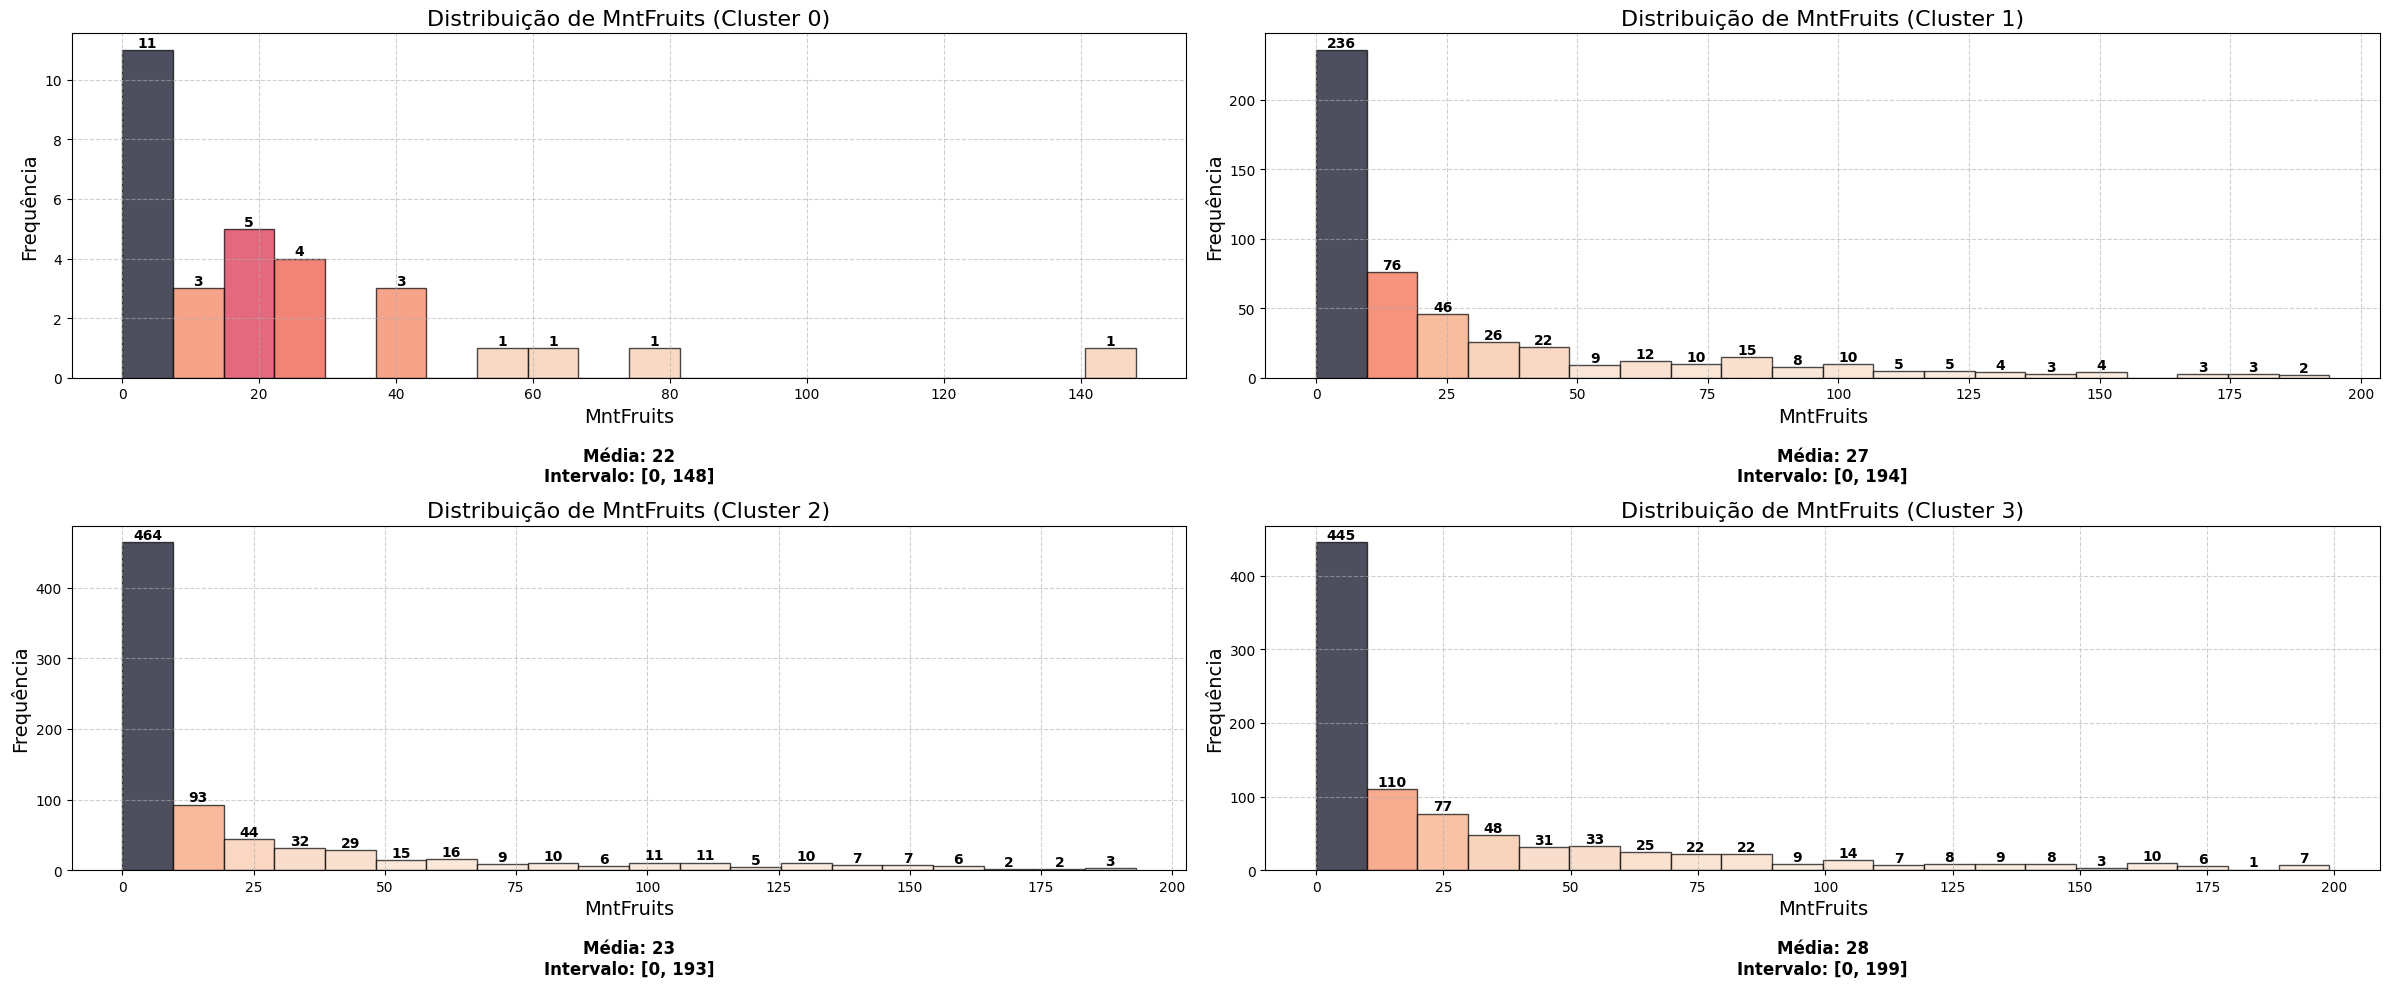

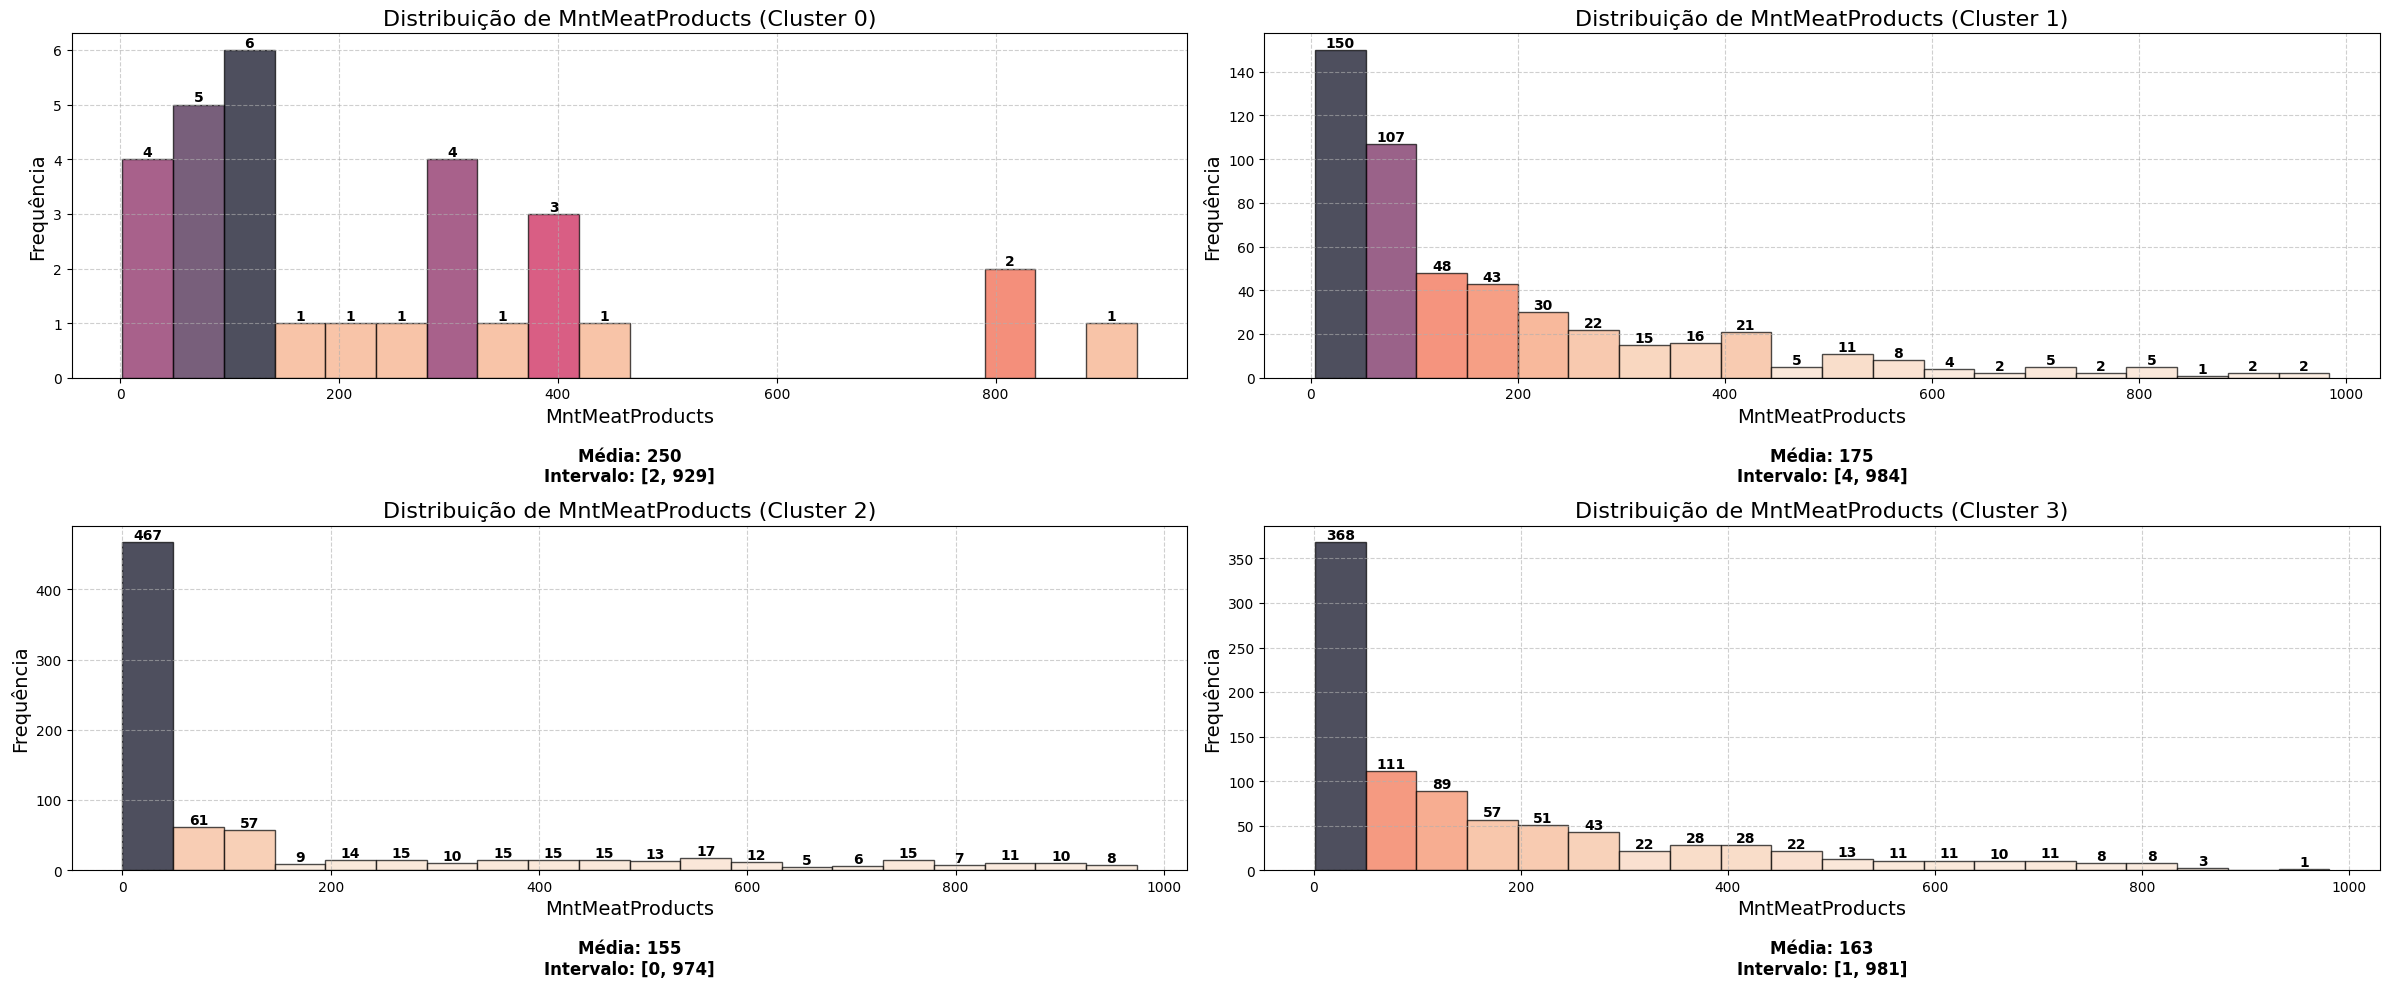

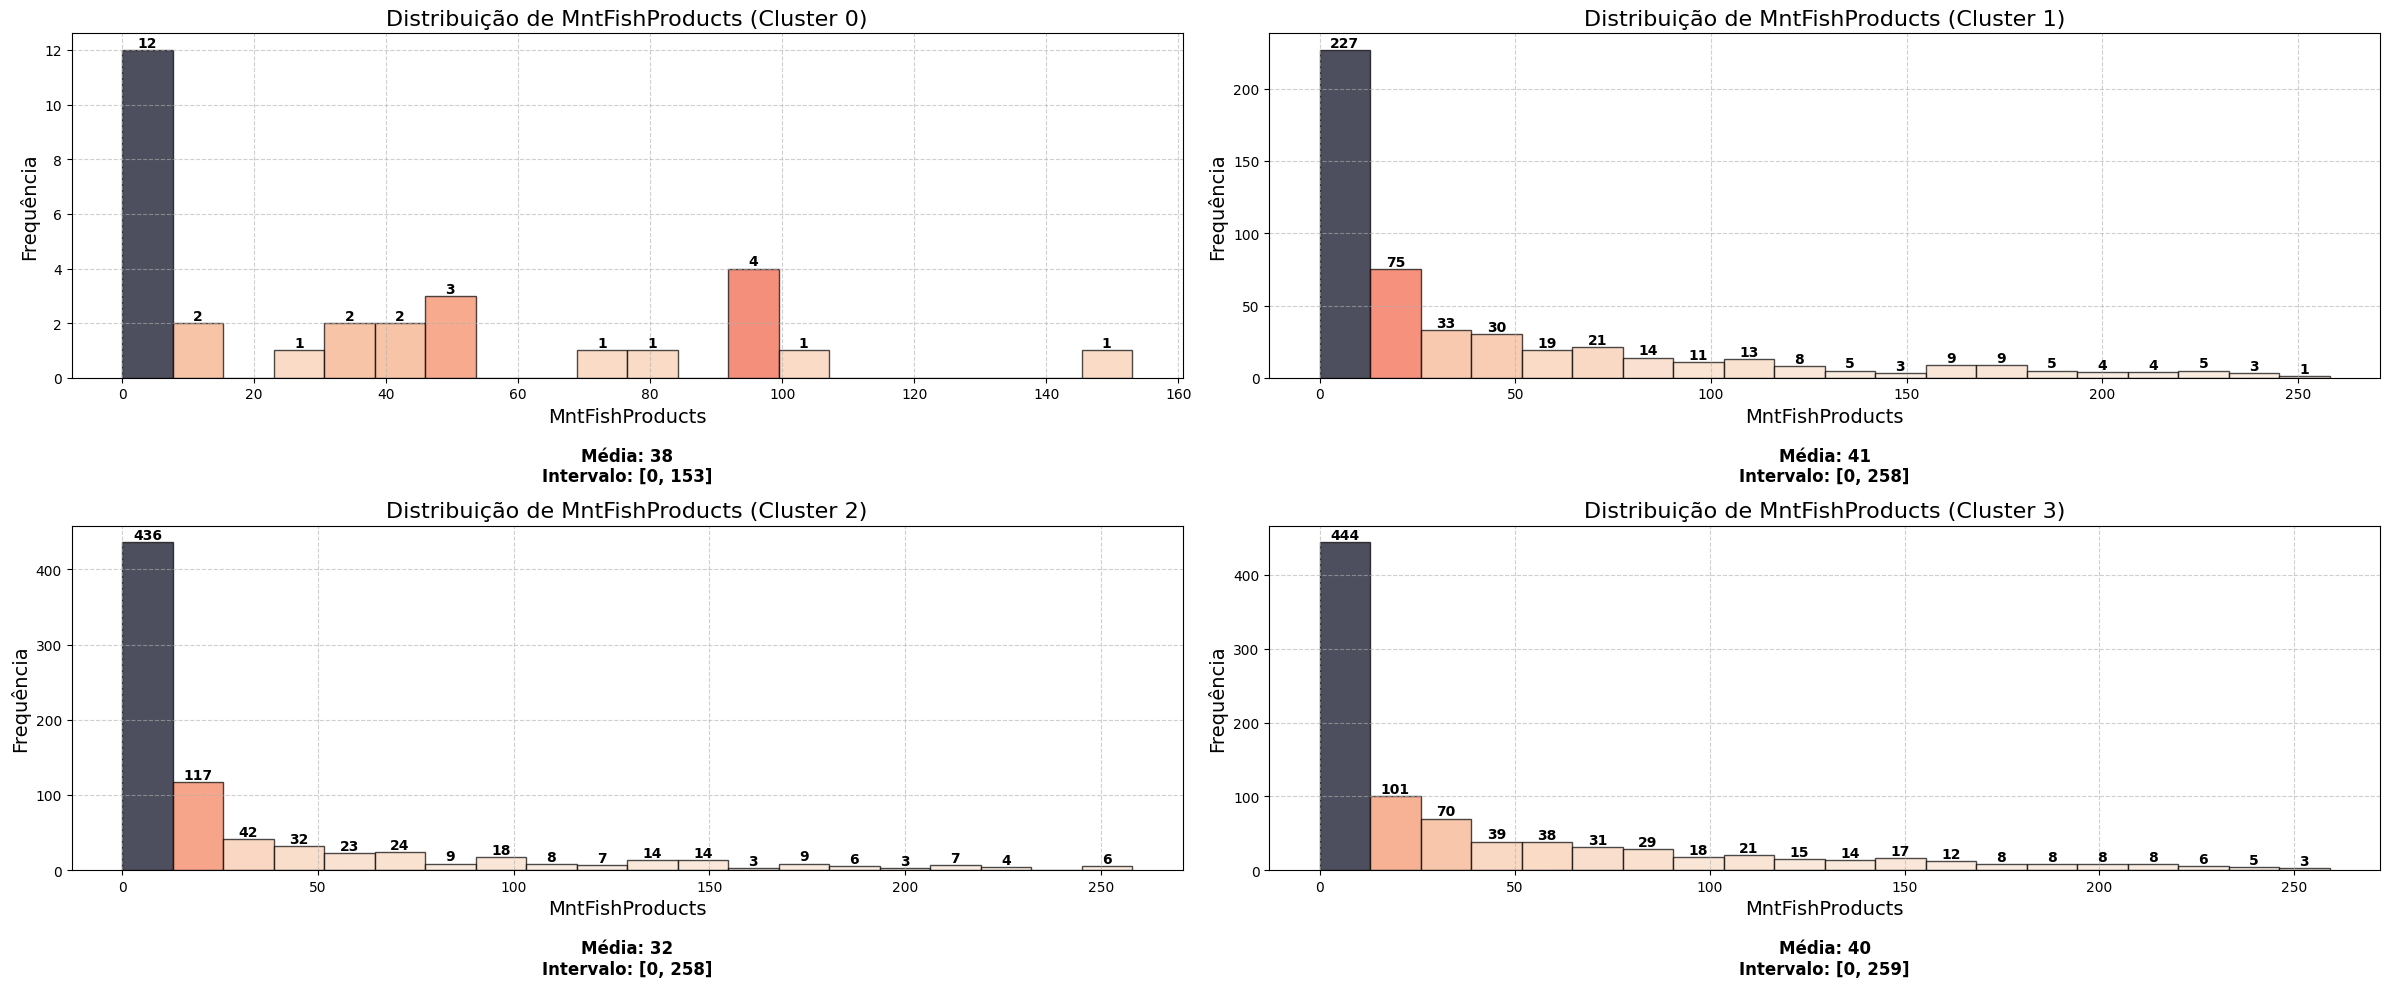

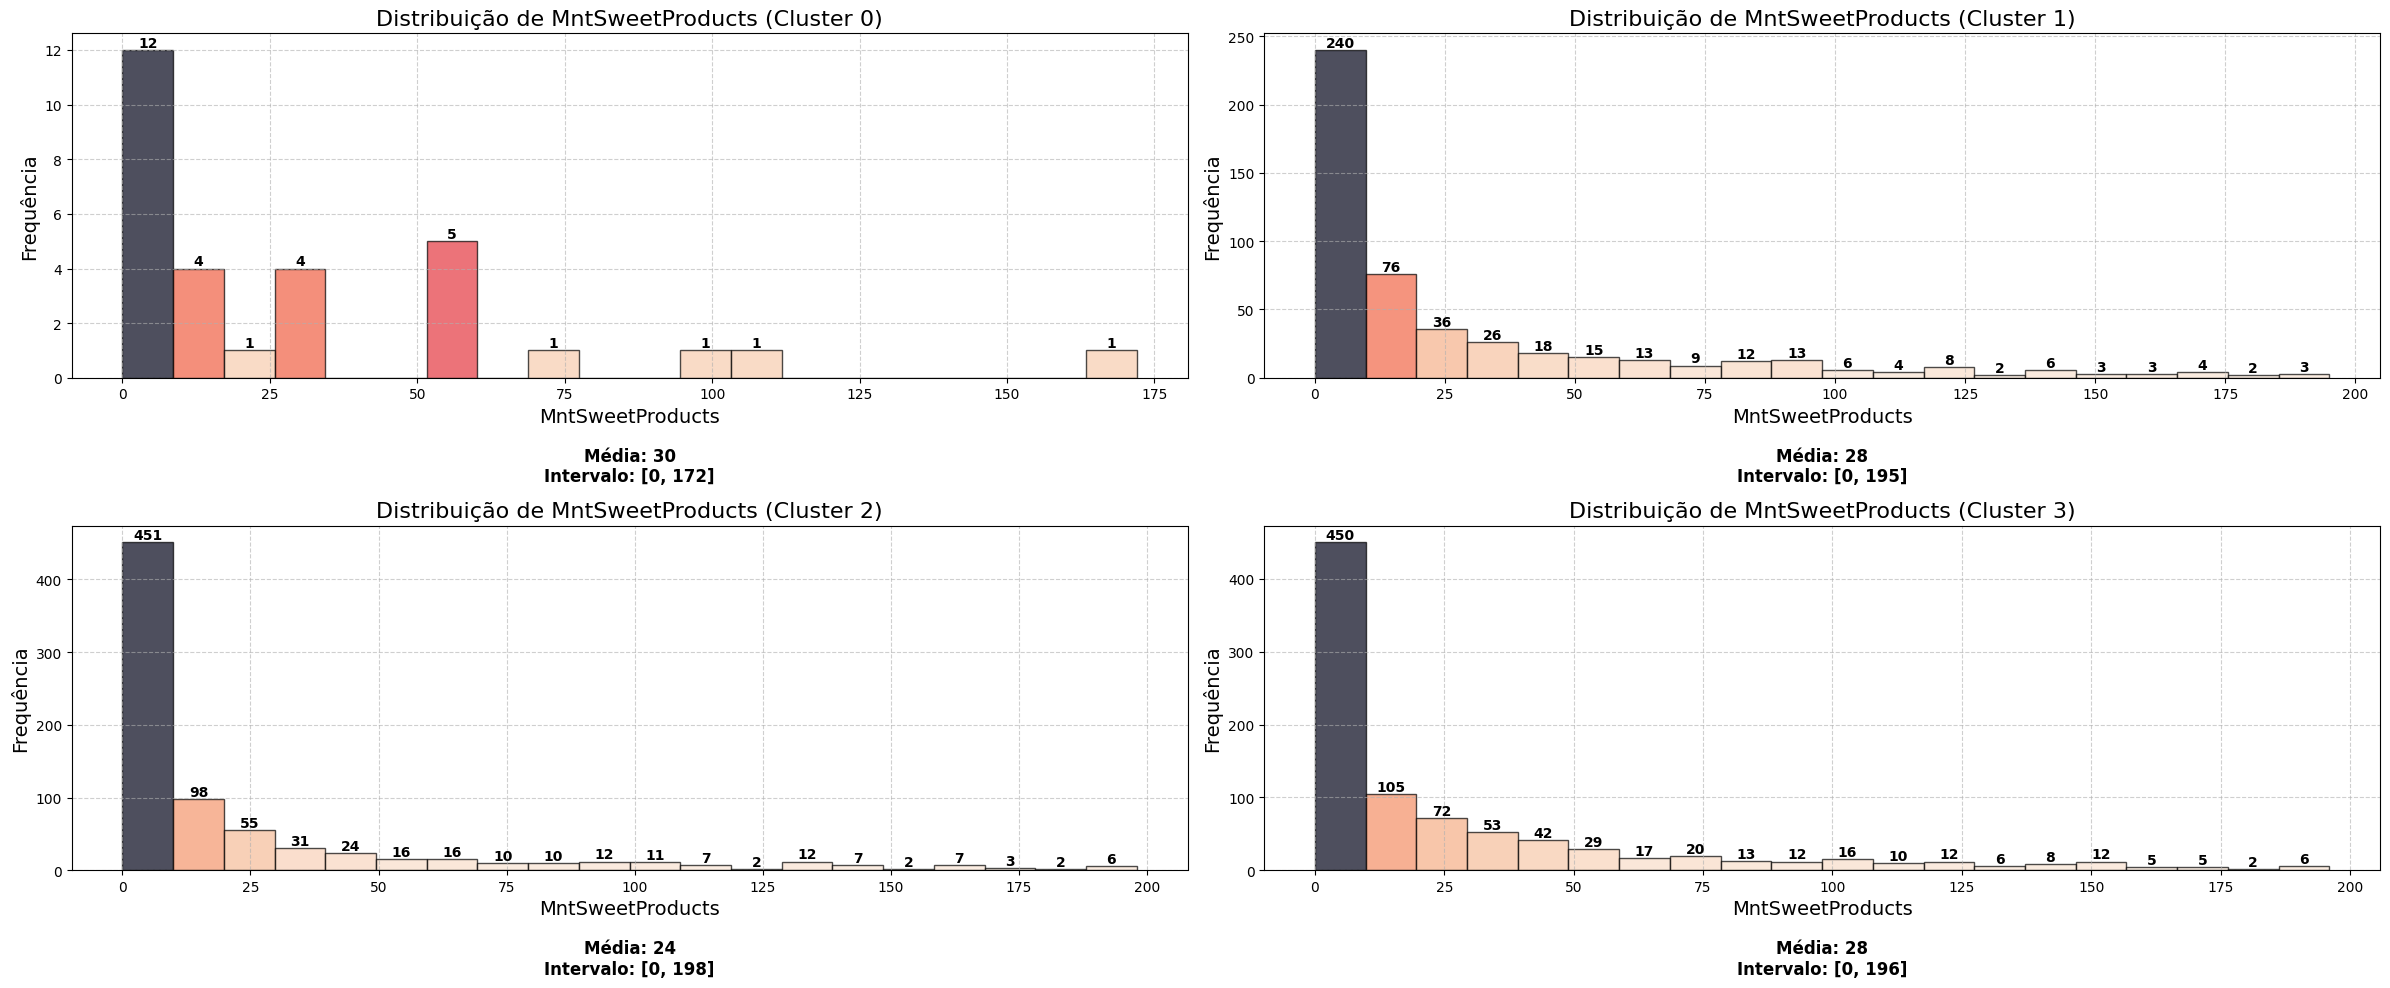

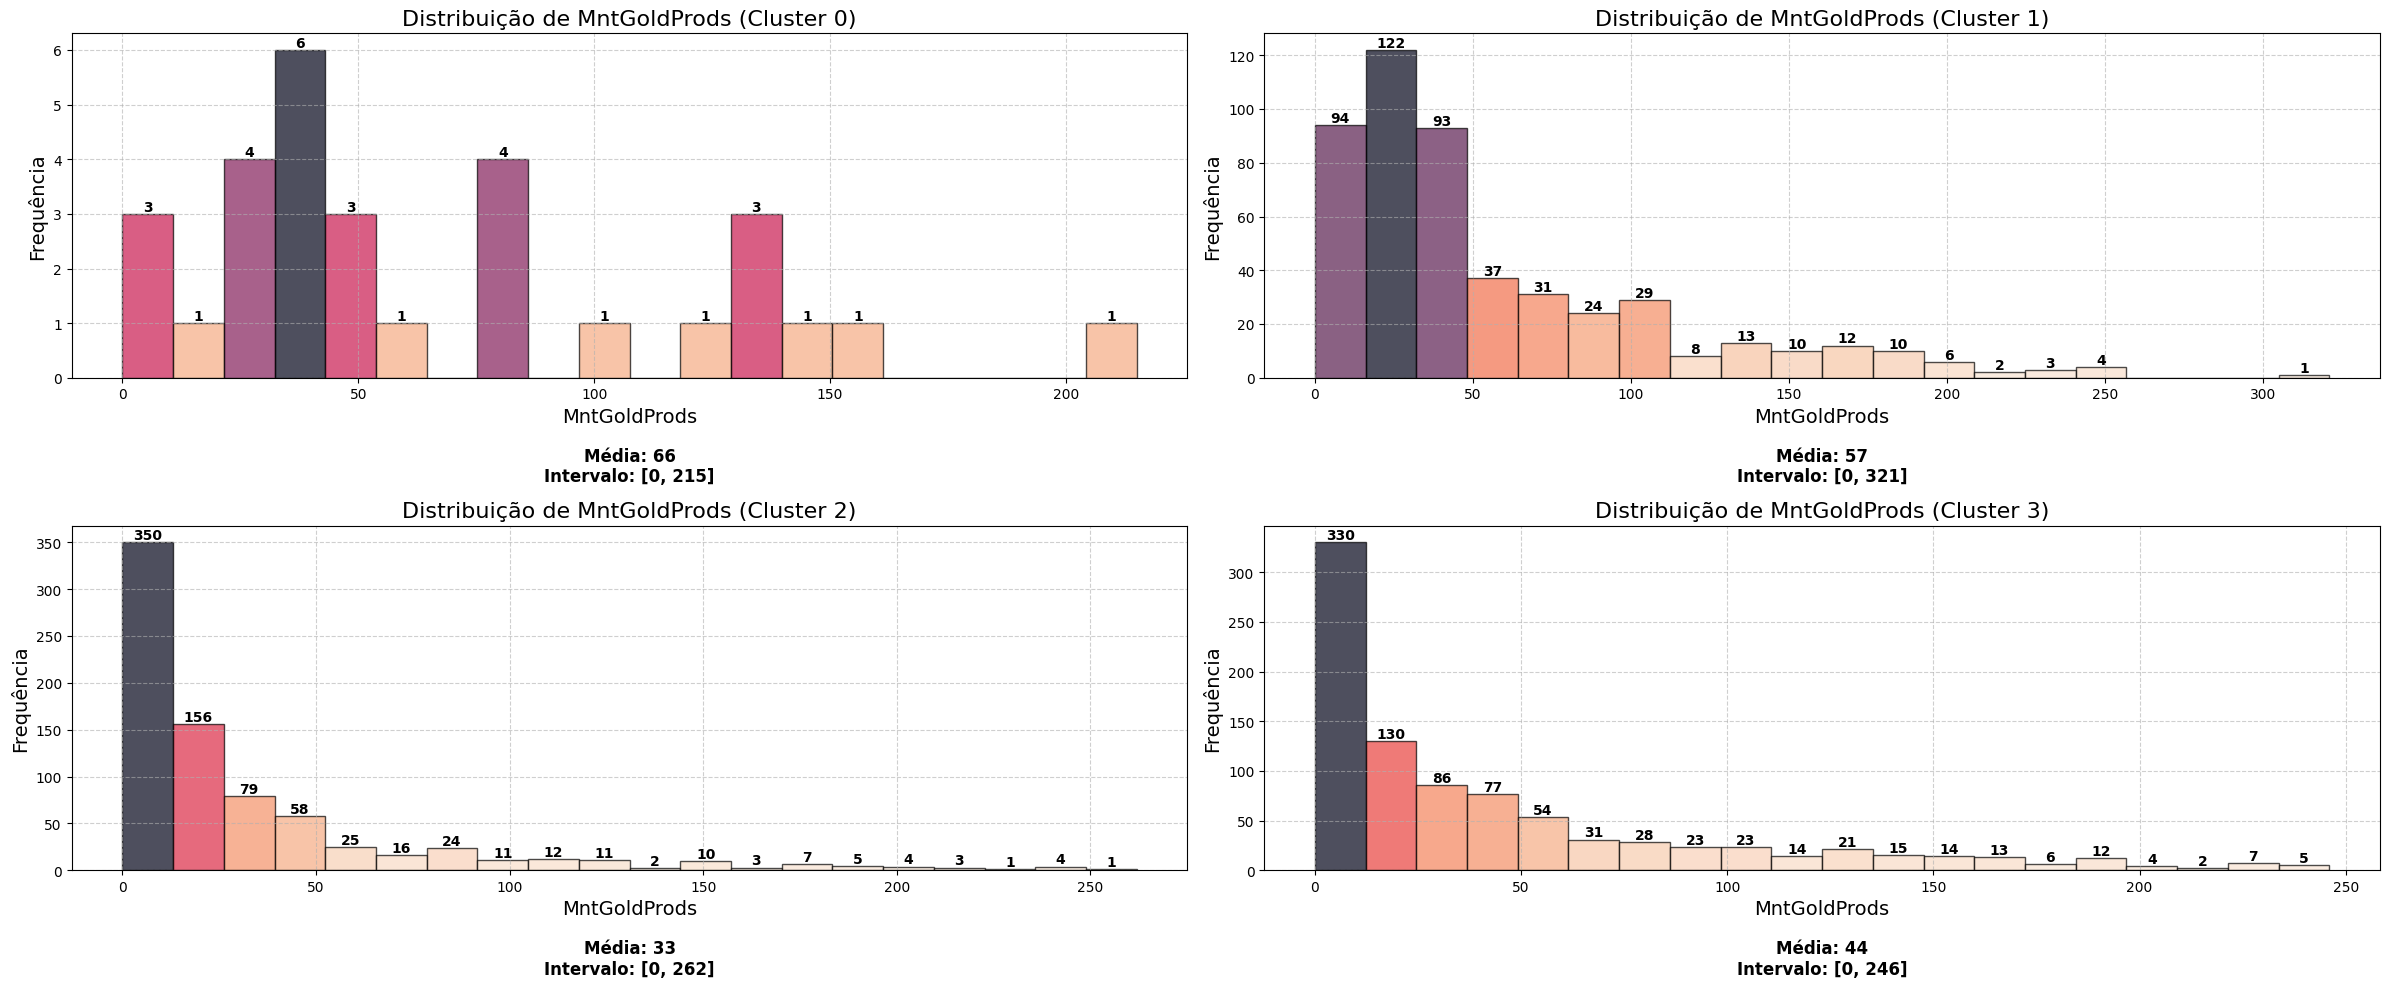

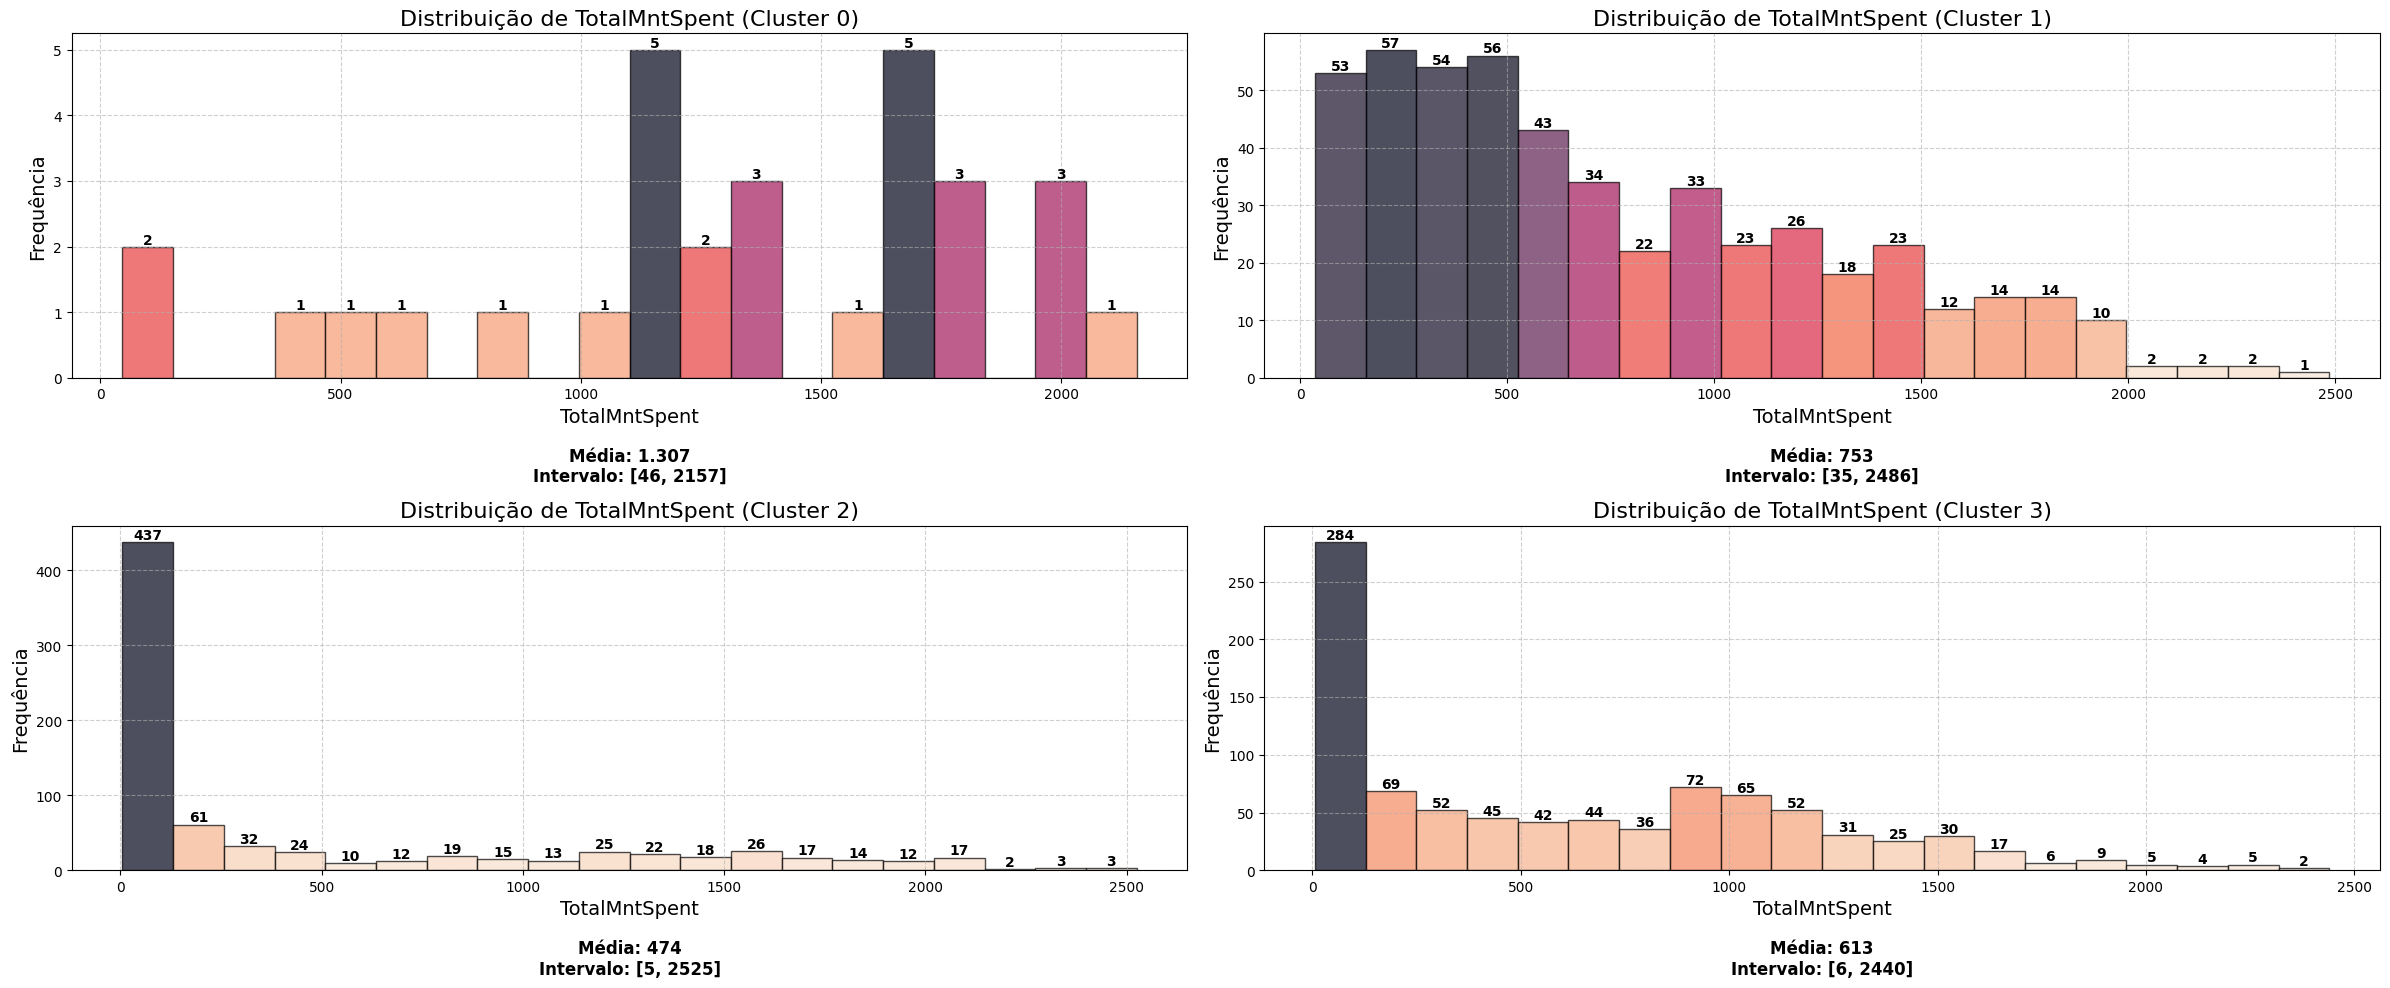

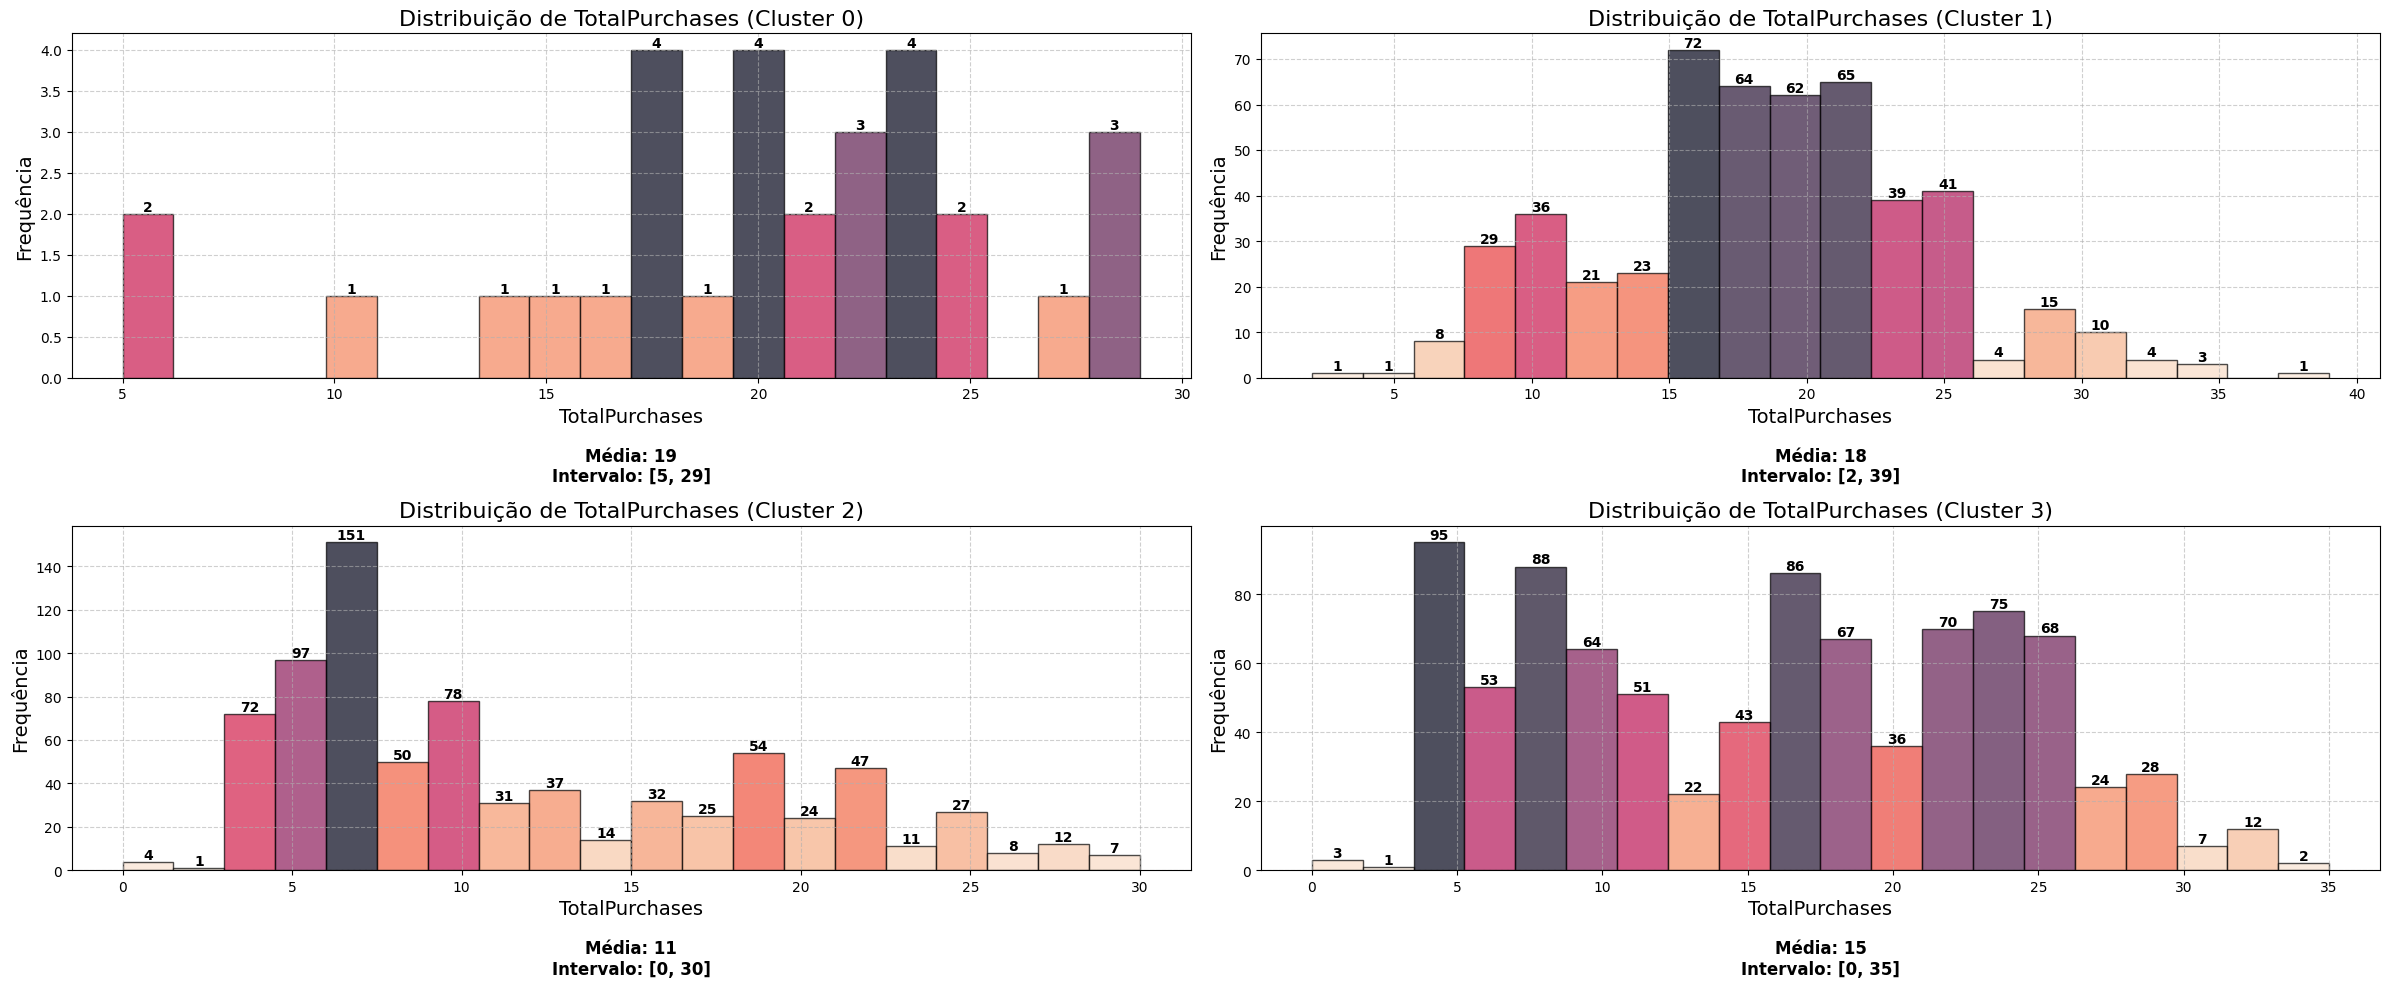

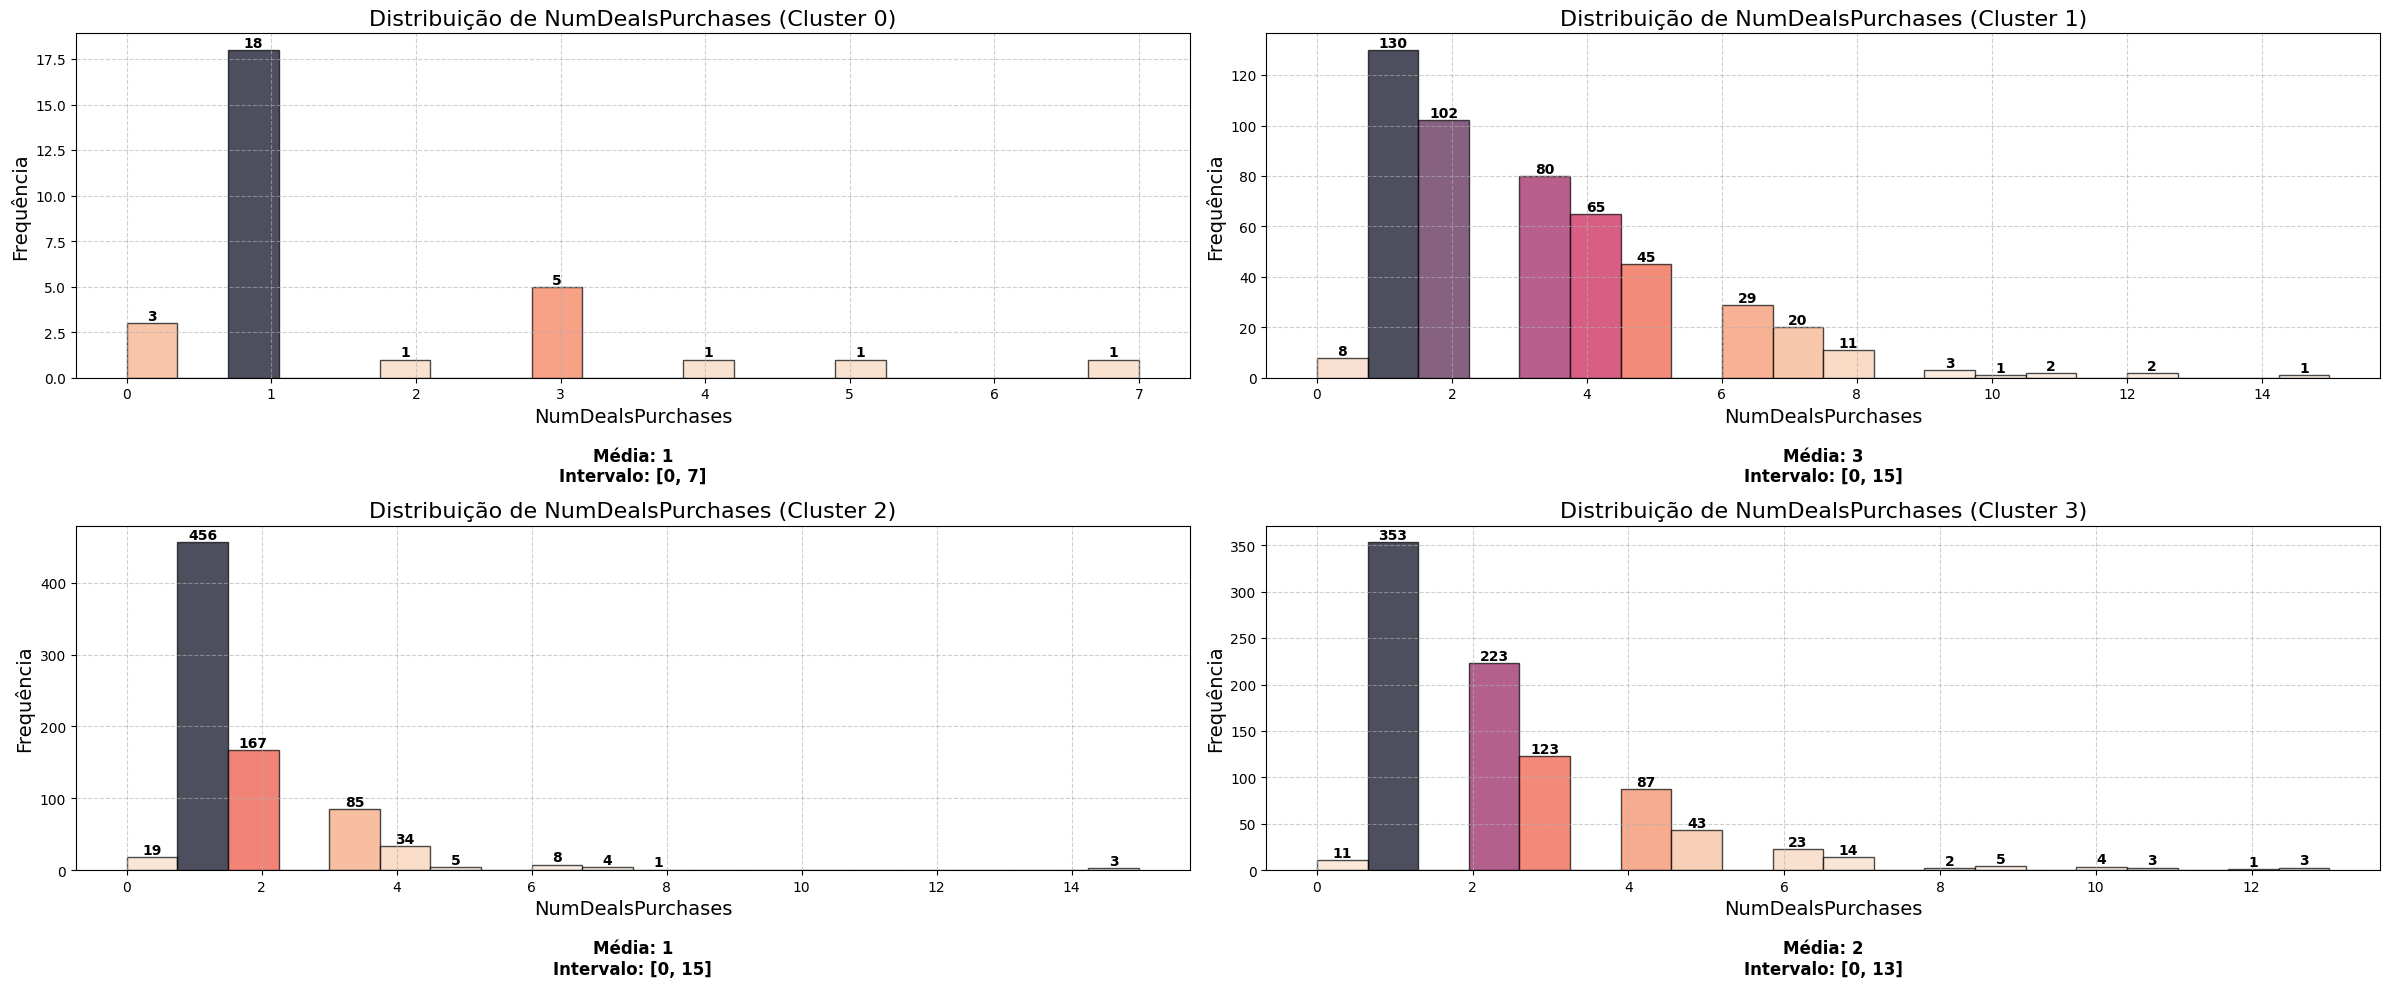

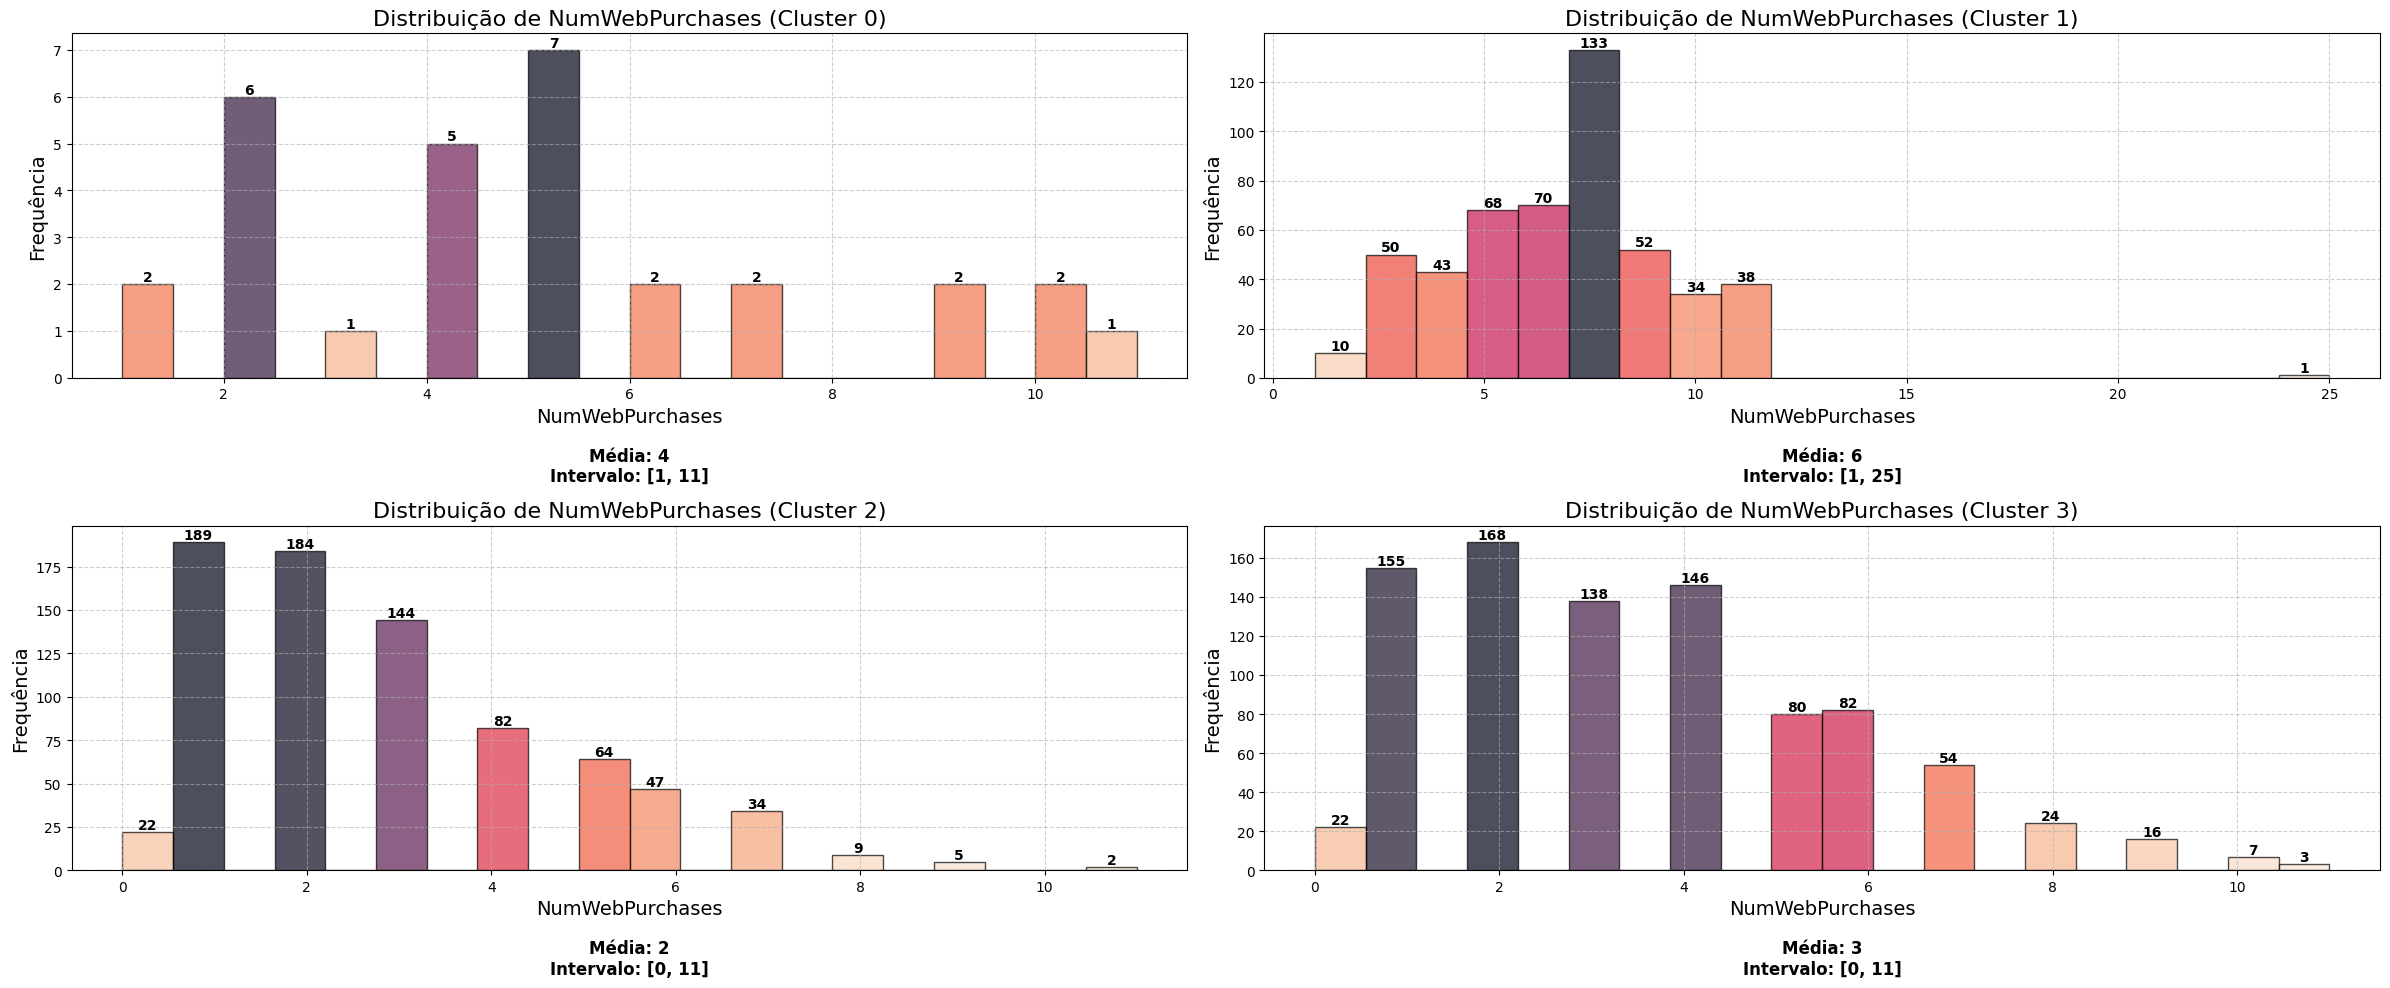

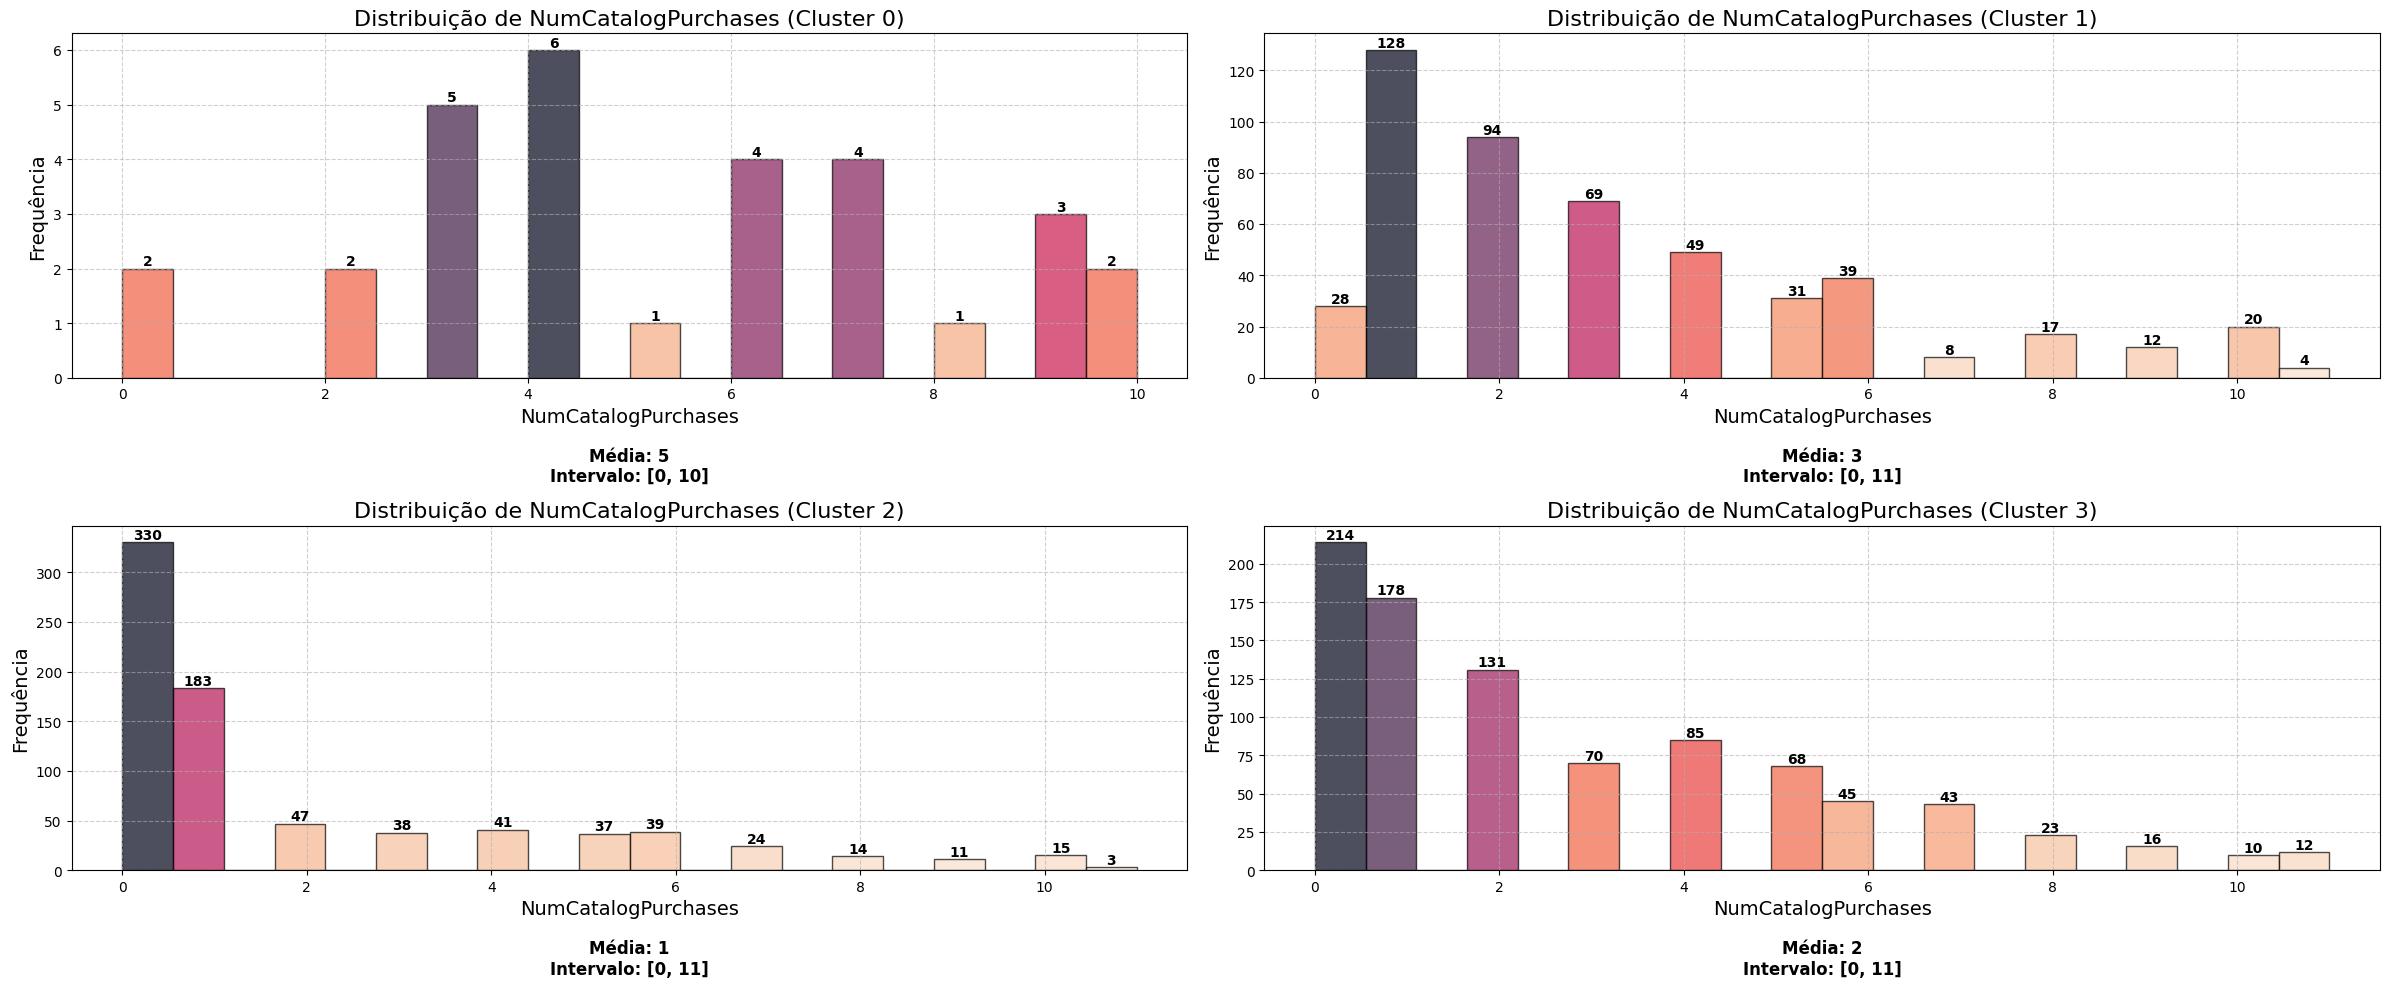

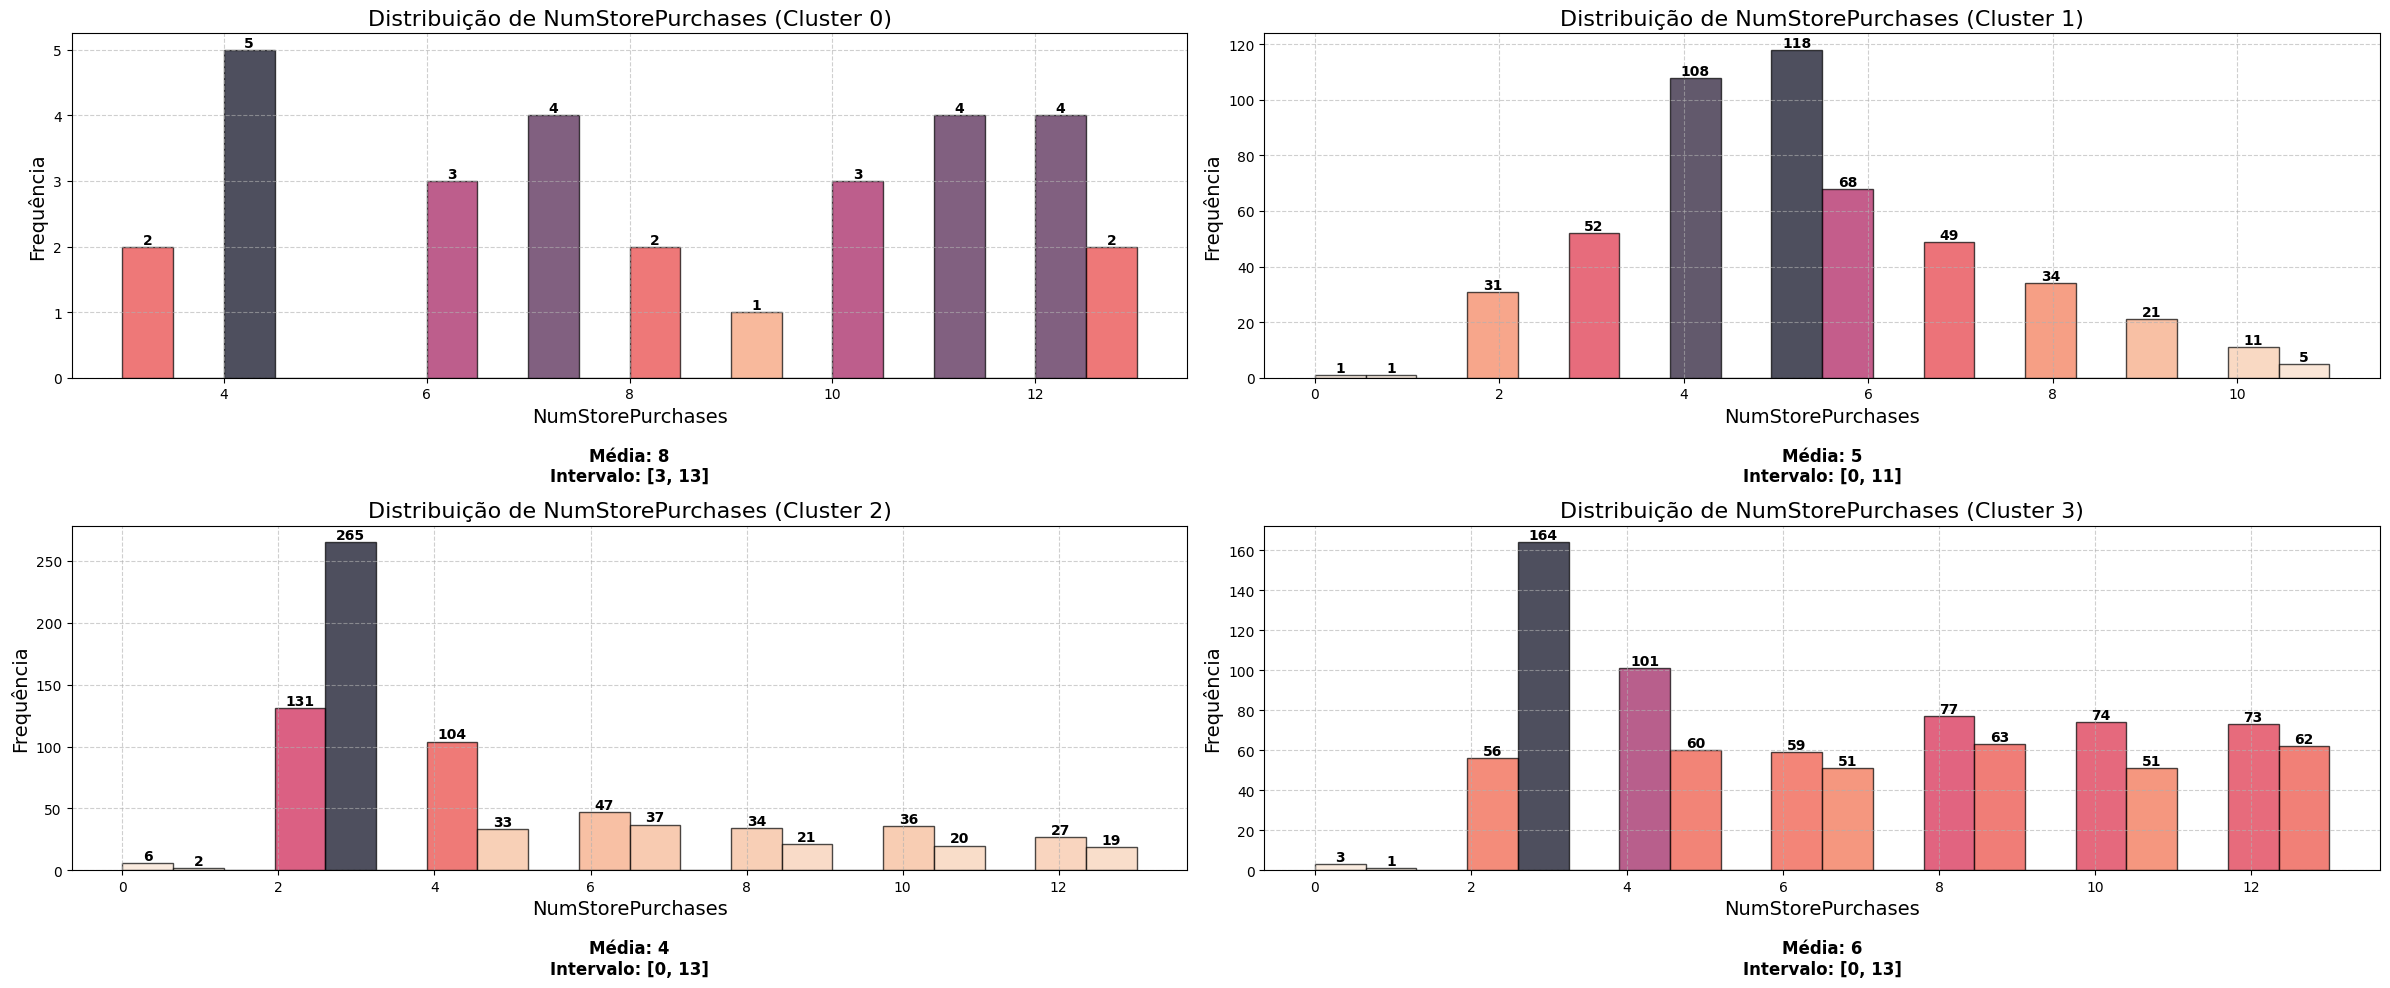

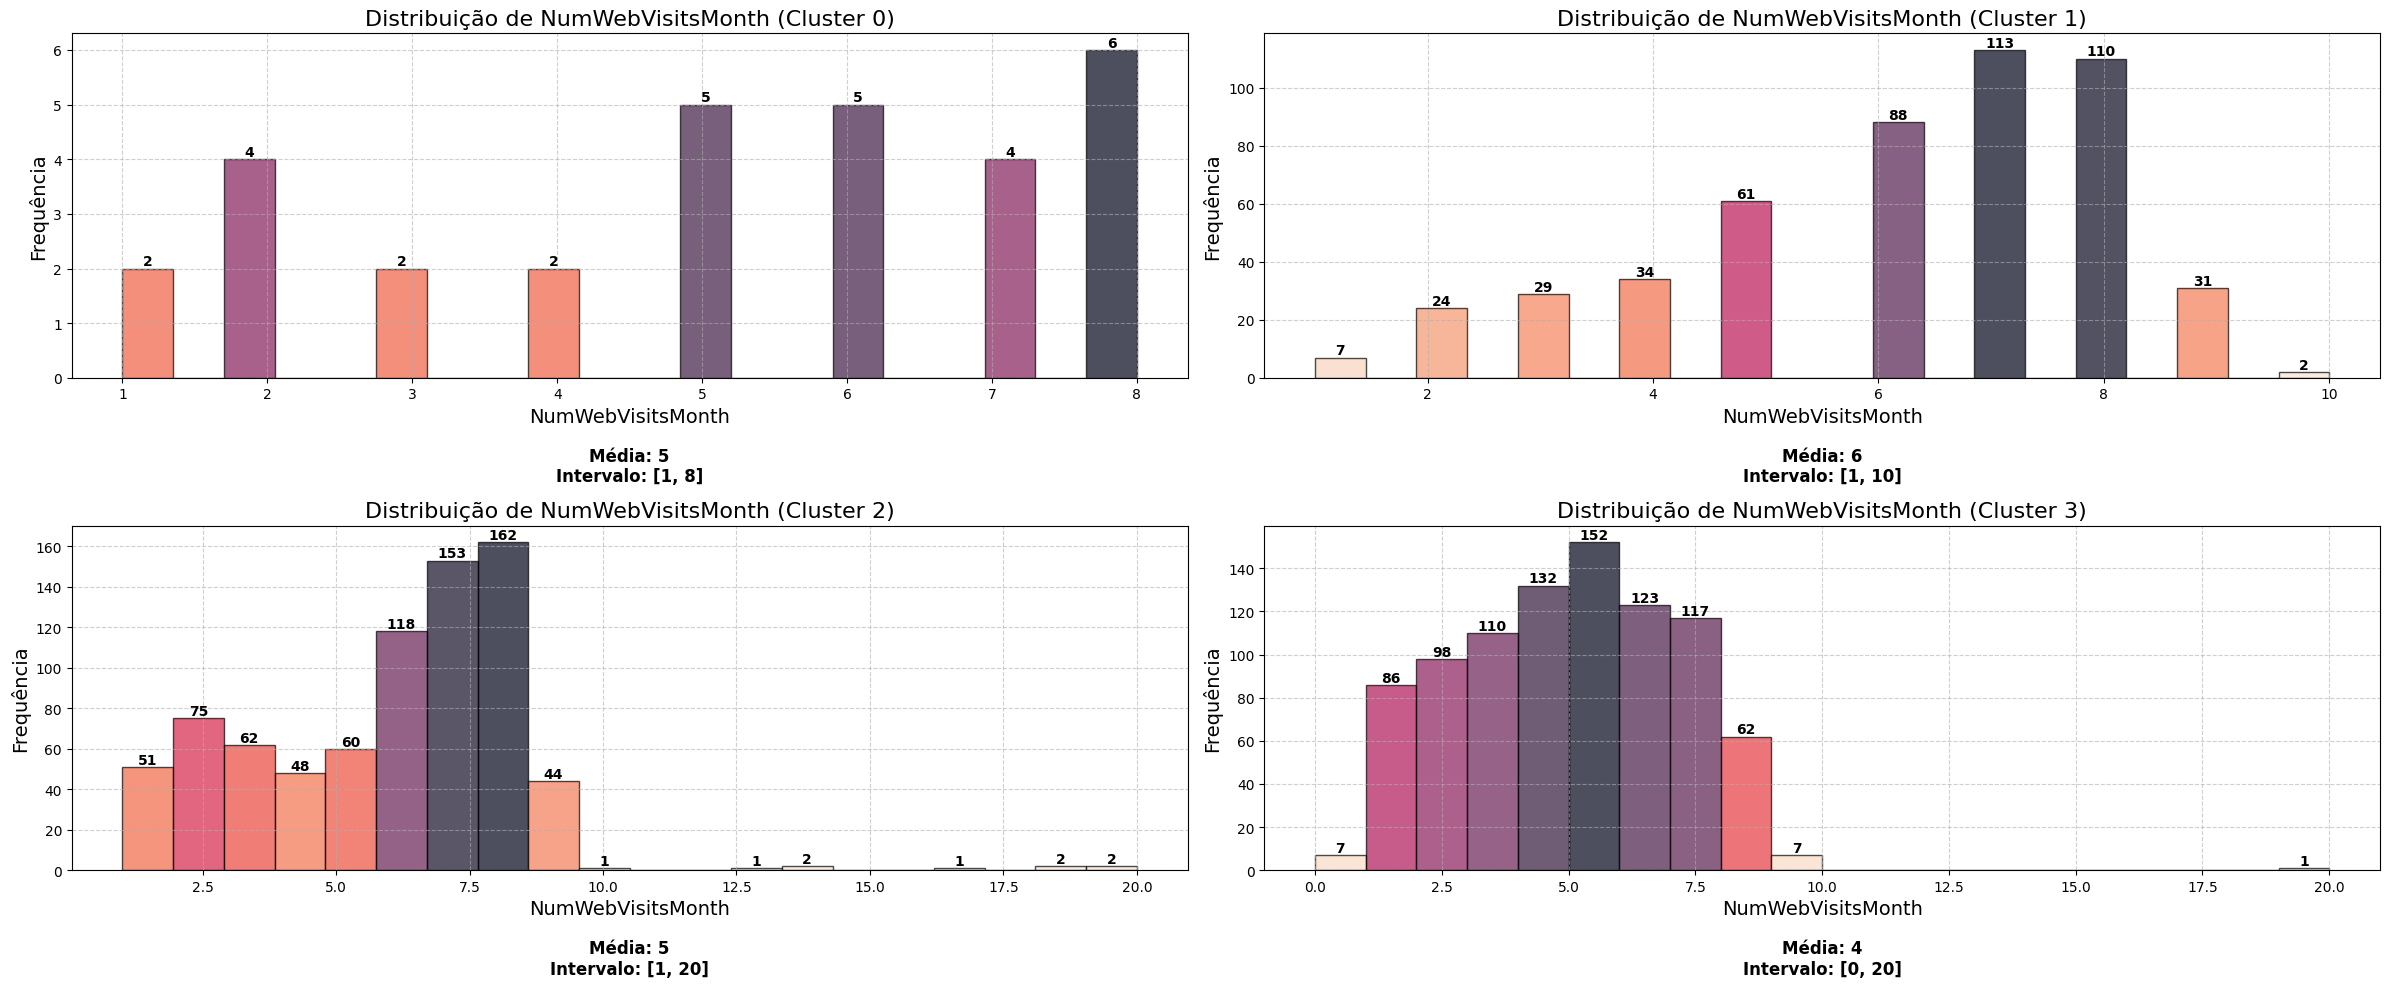

In [7]:
def plot_distribution_by_cluster(column):
    plt.figure(figsize=(24, 10))
    
    clusters = [0, 1, 2, 3]
    for i, cluster in enumerate(clusters, 1):
        plt.subplot(2, 2, i)
        cluster_data = df[df['Clusters'] == cluster]
        

        n, bins, patches = plt.hist(cluster_data[column], bins=20, color='blue', alpha=0.7, edgecolor='black')
        for j in range(len(patches)):
            patches[j].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[j] / max(n)))
            if n[j] > 0:
                plt.text(patches[j].get_x() + patches[j].get_width() / 2, n[j], int(n[j]), 
                            ha='center', va='bottom', fontsize=10, fontweight='bold')
        plt.title(f'Distribuição de {column} (Cluster {cluster})', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequência', fontsize=14)
        
        plt.grid(True, linestyle='--', alpha=0.6)
        
        # Calcular a média e o intervalo dos valores
        mean_value = cluster_data[column].mean()
        min_value = cluster_data[column].min()
        max_value = cluster_data[column].max()
        
        # Adicionar a média e o intervalo abaixo do gráfico
        plt.text(0.5, -0.2, f'Média: {format(mean_value)}\nIntervalo: [{min_value}, {max_value}]', 
                 ha='center', va='top', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    
    plt.tight_layout()
    plt.show()

lista = ['Income', 'Age', 'Recency', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'TotalMntSpent', 'TotalPurchases',
        'NumDealsPurchases',  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for col in lista:
    plot_distribution_by_cluster(col)

In [8]:
# 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
# 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedAnyCampaign', 'Response'
# 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'WebVsStorePurchases'
# 'Age', 'FamilySize', 'Children', 'Kidhome', 'Teenhome', 'Recency', 'Complain'
# 'Income', 'TotalMntSpent', 'TotalPurchases', 'AvgPurchaseValue', 'NumDealsPurchases'

C:\Users\schit\AppData\Local\Temp\ipykernel_18004\3079075453.py:12: RuntimeWarning: overflow encountered in scalar subtract
  df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


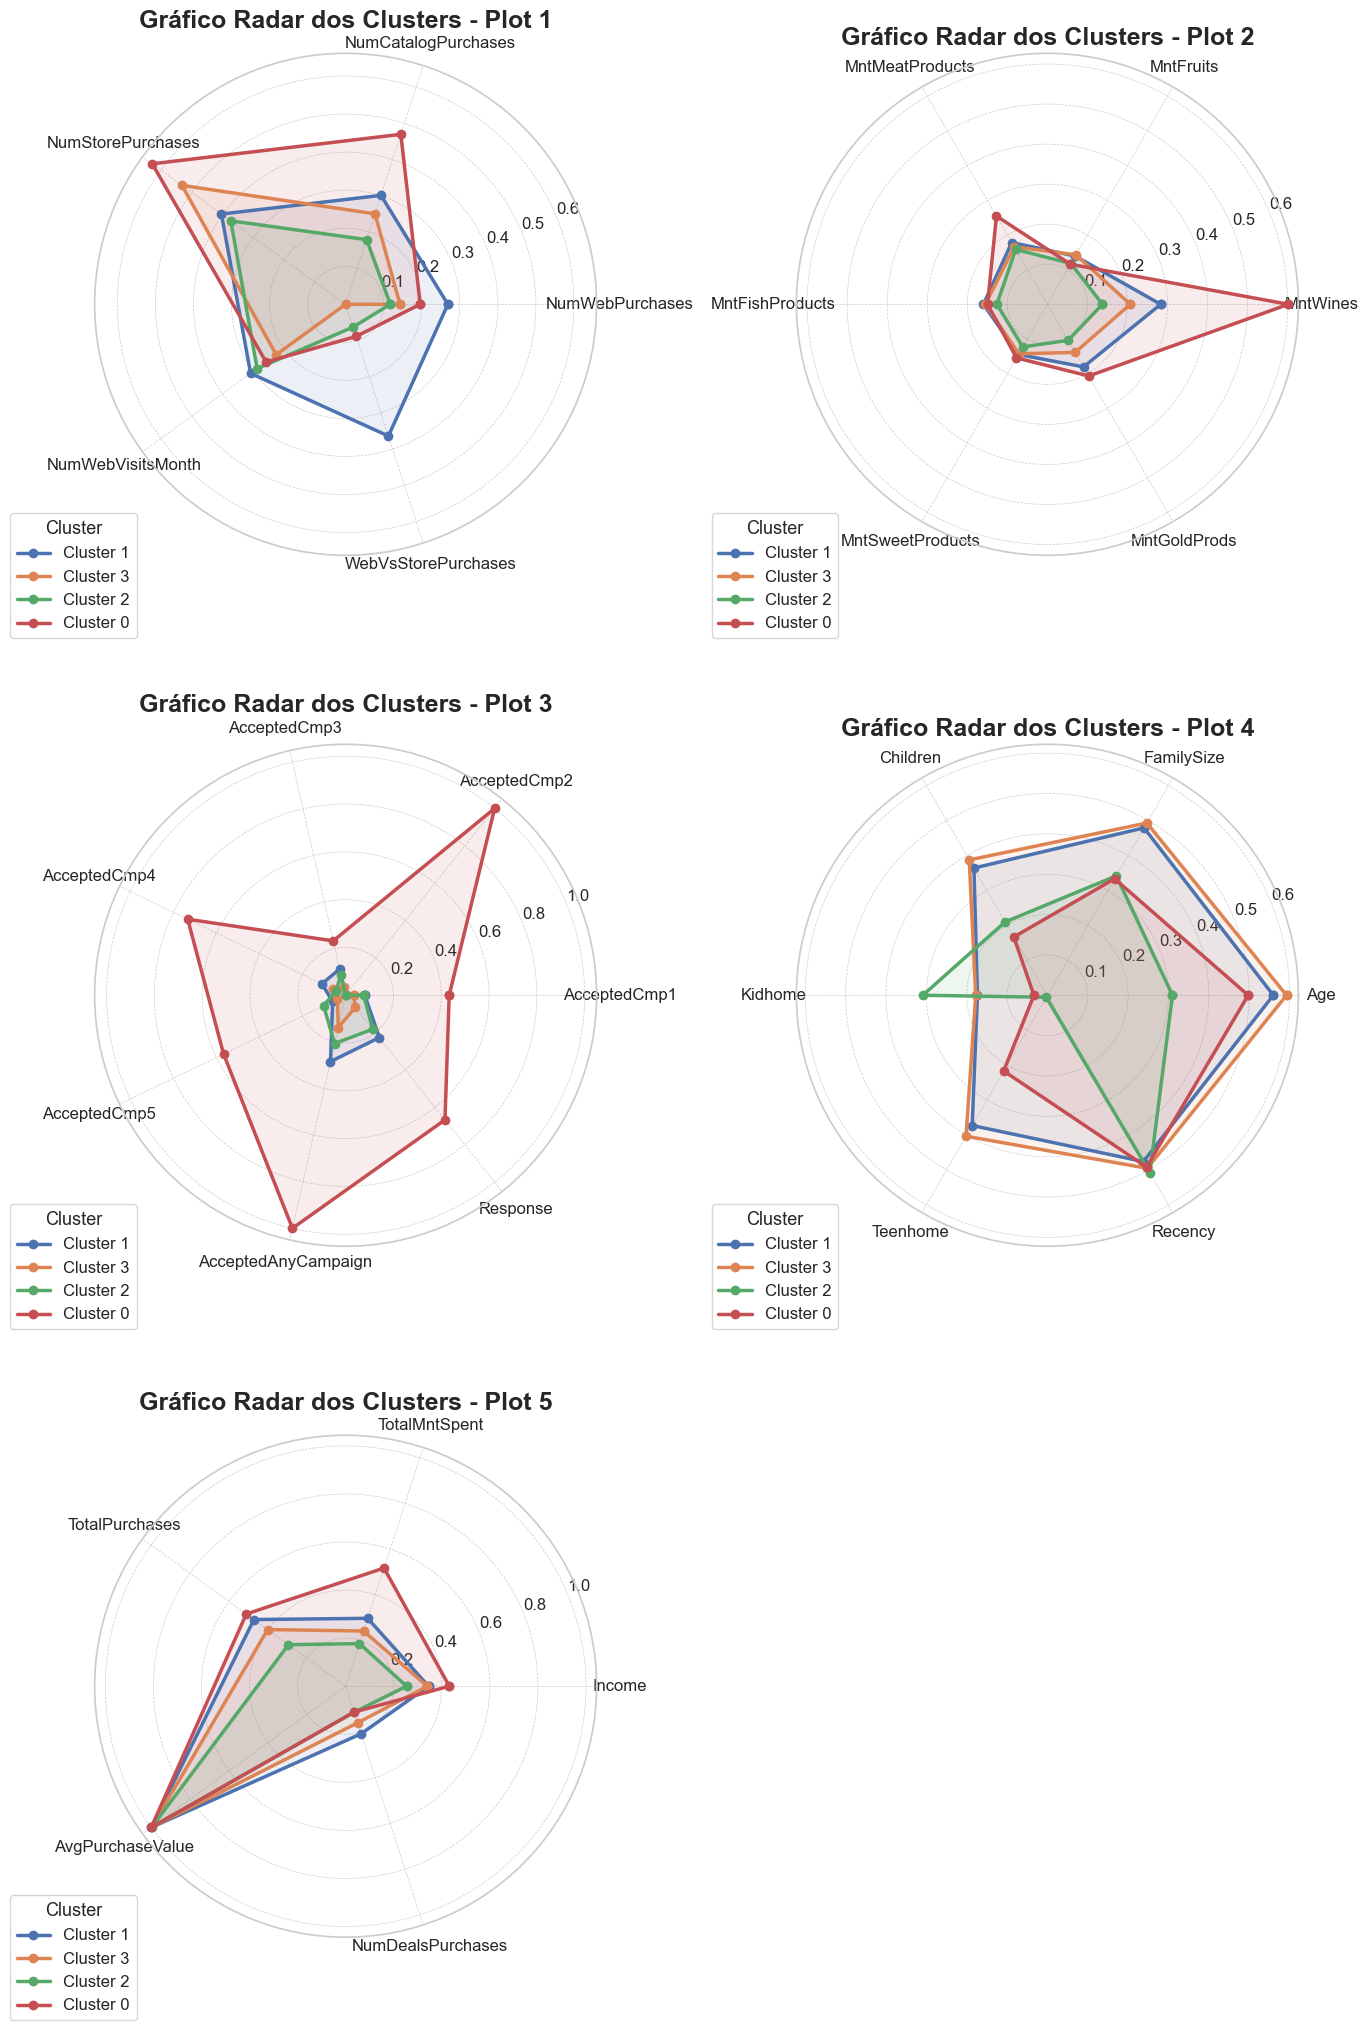

In [9]:
def radar(multiple_columns):
    # Definir o estilo do Seaborn
    sns.set(style='whitegrid')
    
    # Selecionar as colunas de interesse
    clusters = df['Clusters'].unique()

    # Normalizar os dados
    df_normalized = df.copy()
    for columns in multiple_columns:
        for column in columns:
            df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

    # Criar o gráfico de Radar
    num_plots = len(multiple_columns)
    num_rows = (num_plots + 1) // 2
    fig, axs = plt.subplots(num_rows, 2, figsize=(14, 7 * num_rows), subplot_kw=dict(polar=True))

    axs = axs.flatten()

    for idx, columns in enumerate(multiple_columns):
        data = []
        for cluster in clusters:
            cluster_data = df_normalized[df_normalized['Clusters'] == cluster][columns].mean().tolist()
            data.append(cluster_data)

        N = len(columns)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        ax = axs[idx]
        for i, cluster_data in enumerate(data):
            values = cluster_data + cluster_data[:1]
            ax.plot(angles, values, linewidth=2.5, linestyle='solid', marker='o', label=f'Cluster {clusters[i]}')
            ax.fill(angles, values, alpha=0.1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(columns, fontsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_title(f'Gráfico Radar dos Clusters - Plot {idx+1}', fontsize=18, fontweight='bold')
        ax.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', bbox_to_anchor=(0.1, 0.1))
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Rimuovere eventuali subplot vuoti
    for j in range(idx + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout(pad=2.0)
    plt.show()

# Exemplo de uso
radar([
    ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'WebVsStorePurchases'],
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedAnyCampaign', 'Response'],
    ['Age', 'FamilySize', 'Children', 'Kidhome', 'Teenhome', 'Recency'],
    ['Income', 'TotalMntSpent', 'TotalPurchases', 'AvgPurchaseValue', 'NumDealsPurchases']
])

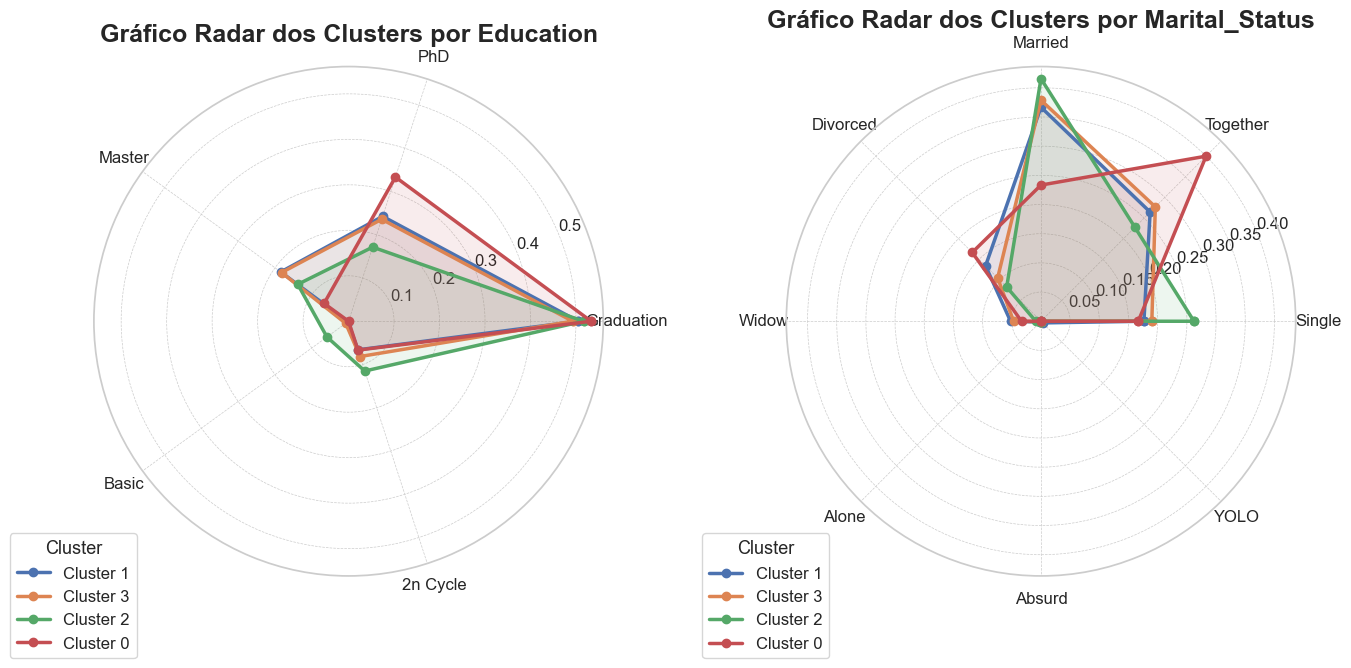

In [10]:
def radar_categorical(columns):
    # Definir o estilo do Seaborn
    sns.set(style='whitegrid')
    
    # Selecionar os clusters únicos
    clusters = df['Clusters'].unique()

    num_plots = len(columns)
    num_rows = (num_plots + 1) // 2
    fig, axs = plt.subplots(num_rows, 2, figsize=(14, 7 * num_rows), subplot_kw=dict(polar=True))

    axs = axs.flatten()

    for idx, column in enumerate(columns):
        categories = df[column].unique()
        
        # Preparar os dados para o gráfico de Radar
        data = []
        for cluster in clusters:
            cluster_data = []
            for category in categories:
                category_freq = df[(df['Clusters'] == cluster) & (df[column] == category)].shape[0] / df[df['Clusters'] == cluster].shape[0]
                cluster_data.append(category_freq)
            data.append(cluster_data)

        # Criar o gráfico de Radar
        N = len(categories)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        ax = axs[idx]
        for i, cluster_data in enumerate(data):
            values = cluster_data + cluster_data[:1]
            ax.plot(angles, values, linewidth=2.5, linestyle='solid', marker='o', label=f'Cluster {clusters[i]}')
            ax.fill(angles, values, alpha=0.1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_title(f'Gráfico Radar dos Clusters por {column}', fontsize=18, fontweight='bold')
        ax.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', bbox_to_anchor=(0.1, 0.1))
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Rimuovere eventuali subplot vuoti
    for j in range(idx + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout(pad=2.0)
    plt.show()

# Exemplo de uso
radar_categorical(['Education', 'Marital_Status'])

No gráfico de **Marital_Status**, os clusters representam diferentes perfis de clientes com base no estado civil. Aqui está uma análise detalhada para cada cluster, com base nas proporções observadas:

1. **Cluster 0 (linha vermelha):**
   - Tem forte presença na categoria **Together**, indicando que muitos clientes desse cluster estão em relacionamentos (uniões estáveis, mas não formalmente casados).
   - Também apresenta uma participação notável em **Married** e **Single**, mas menor em outras categorias como **Divorced** e **Widow**.
   - Pode representar pessoas em relacionamentos, mas não exclusivamente casadas, talvez em uma fase de vida de estabilidade conjugal.

2. **Cluster 1 (linha azul):**
   - Este cluster parece mais balanceado, com proporções relativamente distribuídas entre **Married**, **Together**, e **Single**, mas sem grandes picos em nenhuma categoria específica.
   - Mostra proporções baixas nas categorias como **Widow**, **YOLO**, e **Absurd**, o que pode indicar que o cluster inclui pessoas com status civil mais convencionais.
   - Pode representar um perfil mais diversificado em termos de estado civil.

3. **Cluster 2 (linha verde):**
   - Este cluster se destaca fortemente na categoria **Married**, mostrando que a maioria das pessoas nele está formalmente casada.
   - Possui proporções significativamente menores nas categorias **Single**, **Together**, e quase inexistentes nas categorias **Widow**, **YOLO**, e **Absurd**.
   - Pode ser caracterizado como um cluster de pessoas em relacionamentos formais e estáveis.

4. **Cluster 3 (linha laranja):**
   - Apresenta maior proporção em **Single**, indicando que muitos clientes neste cluster estão solteiros.
   - Tem menor presença em categorias como **Married** e **Together** e proporções muito pequenas em **Widow**, **YOLO**, e **Absurd**.
   - Representa um perfil de pessoas solteiras, possivelmente em uma fase de vida mais independente.

---

**Outliers e categorias incomuns:**
- Categorias como **YOLO** e **Absurd** possuem proporções mínimas ou nulas em todos os clusters, sugerindo que são categorias pouco representativas no conjunto de dados.
- A categoria **Widow** também aparece com baixas proporções, sendo marginalmente relevante para a segmentação.

**Conclusão:**
Cada cluster reflete diferentes estados civis que podem ser usados para personalizar estratégias de marketing. Por exemplo:
- O Cluster 2 (principalmente casados) pode ser alvo de produtos ou serviços voltados para famílias.
- O Cluster 3 (solteiros) pode ser ideal para campanhas voltadas a independência, viagens ou hobbies. 

Se precisar de uma análise mais aprofundada ou recomendações específicas, posso ajudar!

C:\Users\schit\AppData\Local\Temp\ipykernel_18004\1564965764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


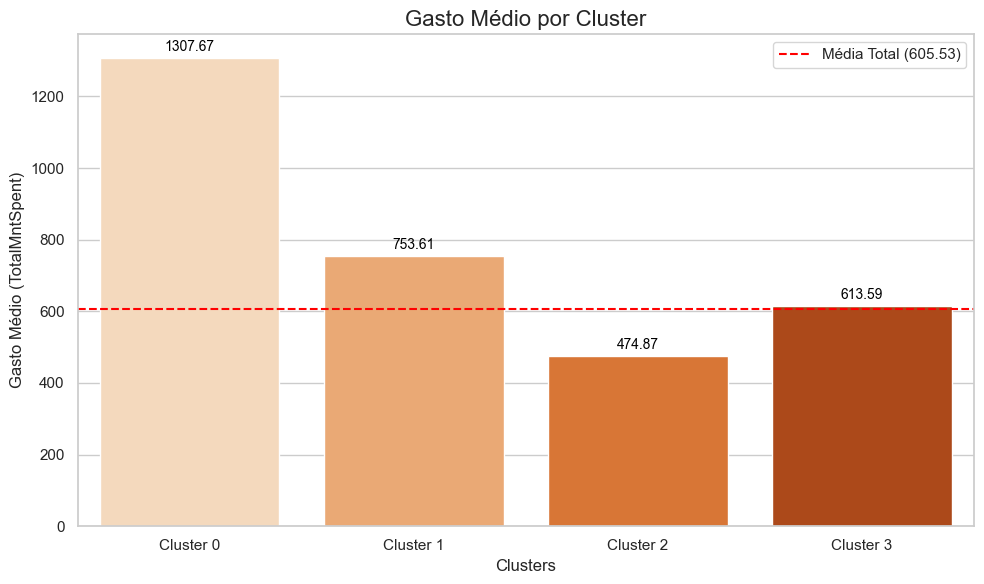

In [11]:
# Cálculo do gasto médio por cluster e geral
avg_spent_per_cluster = df.groupby("Clusters")["TotalMntSpent"].mean().reset_index()
avg_spent_per_cluster["Clusters"] = avg_spent_per_cluster["Clusters"].apply(lambda x: f"Cluster {x}")  # Renomeia os clusters
overall_avg = df["TotalMntSpent"].mean()

# Paleta de cores com diferentes tons de laranja
colors = sns.color_palette("Oranges", len(avg_spent_per_cluster))

# Configuração do estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Gráfico de barras com cores personalizadas
ax = sns.barplot(
    x="Clusters", 
    y="TotalMntSpent", 
    data=avg_spent_per_cluster, 
    palette=colors
)

# Adiciona os números exatos acima de cada barra
for i, row in avg_spent_per_cluster.iterrows():
    plt.text(i, row["TotalMntSpent"] + 20, f'{row["TotalMntSpent"]:.2f}', ha='center', fontsize=10, color="black")

# Adiciona a linha vermelha tracejada para a média geral
plt.axhline(overall_avg, color="red", linestyle="--", label=f"Média Total ({overall_avg:.2f})")

# Personalizações
plt.title("Gasto Médio por Cluster", fontsize=16)
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Gasto Médio (TotalMntSpent)", fontsize=12)
plt.legend()
plt.tight_layout()

# Mostra o gráfico
plt.show()